In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas_ta as pta
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import random
import os
import statistics
from fpdf import FPDF
from yahoo_fin import stock_info as si
from sklearn.linear_model import LinearRegression


In [2]:
ticker="THYAO.IS"
df=si.get_data(ticker)

In [3]:
df.head()

,open,high,low,close,adjclose,volume,ticker
2000-05-10,0.001870,0.001870,0.001806,0.001838,0.001694,212630653.0,THYAO.IS
2000-05-11,0.001806,0.001806,0.001711,0.001775,0.001636,211439905.0,THYAO.IS
2000-05-12,0.001806,0.001806,0.001775,0.001806,0.001664,123850733.0,THYAO.IS
2000-05-15,0.001775,0.001775,0.001711,0.001711,0.001577,145015837.0,THYAO.IS
2000-05-16,0.001743,0.001743,0.001680,0.001743,0.001606,150023501.0,THYAO.IS


In [4]:
df.tail()

,open,high,low,close,adjclose,volume,ticker
2023-10-13,223.800003,224.199997,219.399994,222.199997,222.199997,28481746.0,THYAO.IS
2023-10-16,228.000000,228.300003,222.000000,223.000000,223.000000,31816534.0,THYAO.IS
2023-10-17,223.699997,225.899994,220.000000,225.100006,225.100006,33803978.0,THYAO.IS
2023-10-18,219.699997,221.300003,216.100006,216.500000,216.500000,29175980.0,THYAO.IS
2023-10-19,216.600006,221.100006,213.000000,213.600006,213.600006,40254773.0,THYAO.IS


In [5]:
# DataFrame'den 'open' sütununu alıp 'open_prices' değişkenine atama yaptım
open_prices = df['open']

# DataFrame'den 'close' sütununu alıp 'close_prices' değişkenine atama yaptım
close_prices = df['close']

# DataFrame'den 'volume' sütununu alıp 'volumes' değişkenine atama yaptım
volumes = df['volume']

# DataFrame'den 'high' sütununu alıp 'high_prices' değişkenine atama yaptım
high_prices = df['high']

# DataFrame'den 'low' sütununu alıp 'low_prices' değişkenine atama yaptım
low_prices = df['low']

# DATA_LEN değerini 300 olarak ayarladım
DATA_LEN = 300

# 'close_prices' listesini son 300 öğeyle sınırladım
close_prices = close_prices[len(
    close_prices) - DATA_LEN:len(close_prices)].to_list()

# 'open_prices' listesini son 300 öğeyle sınırladım
open_prices = open_prices[len(open_prices) -
                          DATA_LEN:len(open_prices)].to_list()

# 'volumes' listesini son 300 öğeyle sınırladım
volumes = volumes[len(volumes) - DATA_LEN:len(volumes)].to_list()


high_prices = high_prices[len(high_prices) -
                          DATA_LEN:len(high_prices)].to_list()

# 'low_prices' listesini son 300 öğeyle sınırladım
low_prices = low_prices[len(low_prices) - DATA_LEN:len(low_prices)].to_list()

In [6]:
plt.style.use('dark_background')

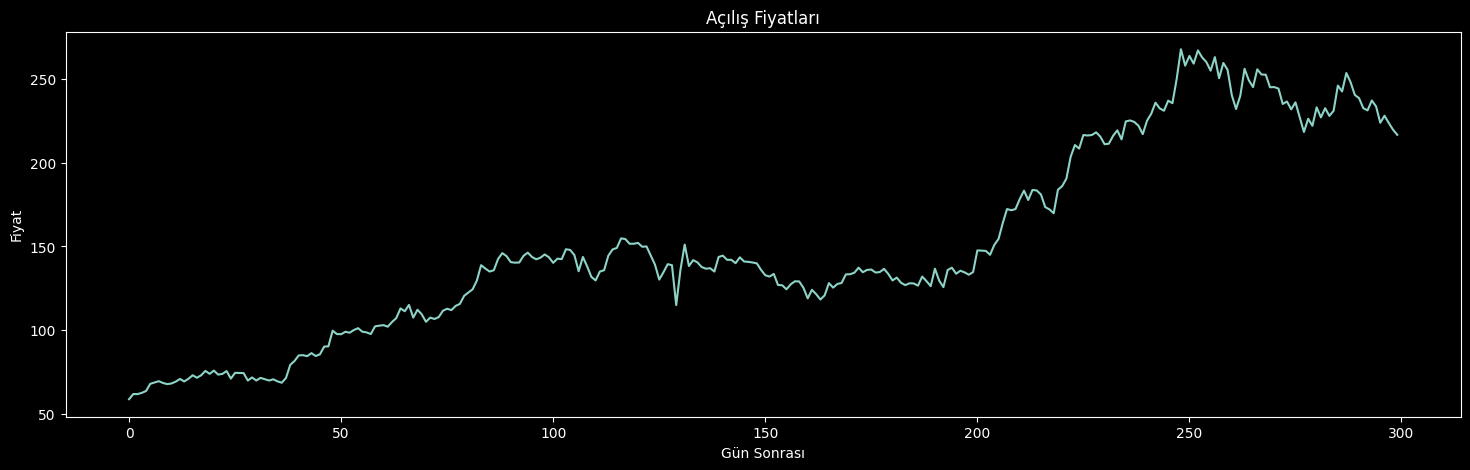

In [7]:
os.makedirs("graphed-results",exist_ok=True)
plt.figure(figsize=(18,5))
plt.title("Açılış Fiyatları")
plt.xlabel("Gün Sonrası")
plt.ylabel("Fiyat")
plt.plot(open_prices)
plt.show()

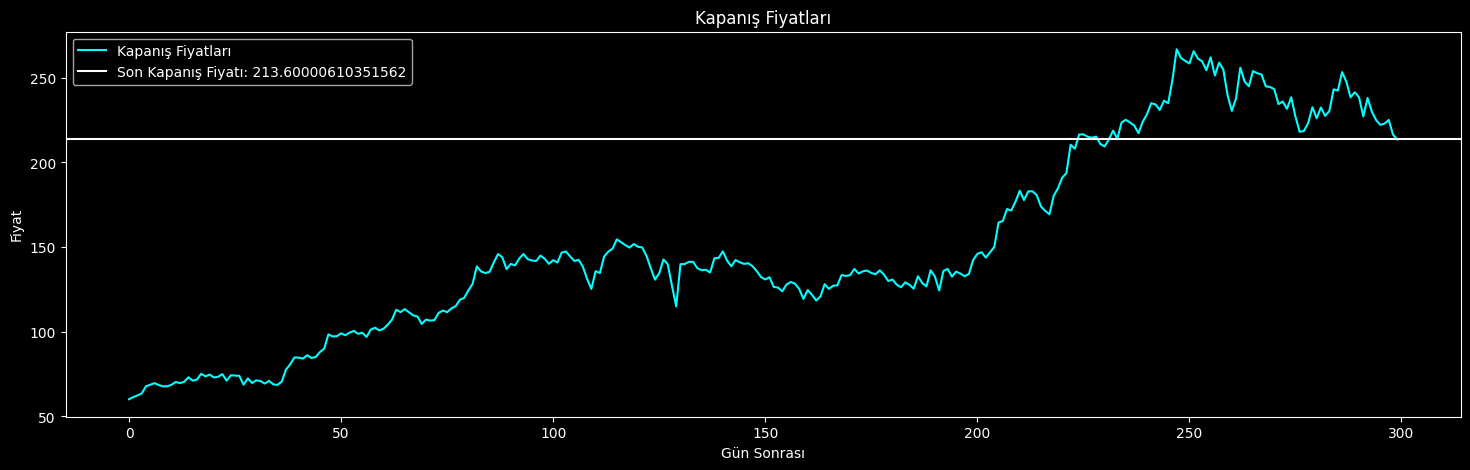

In [8]:
plt.figure(figsize=(18, 5))
plt.title("Kapanış Fiyatları")
plt.xlabel("Gün Sonrası")
plt.ylabel("Fiyat")
plt.plot(close_prices, color="cyan", label="Kapanış Fiyatları")

last_close_price = close_prices[-1]
plt.axhline(y=last_close_price, label=f'Son Kapanış Fiyatı: {last_close_price}')

plt.legend()
plt.show()

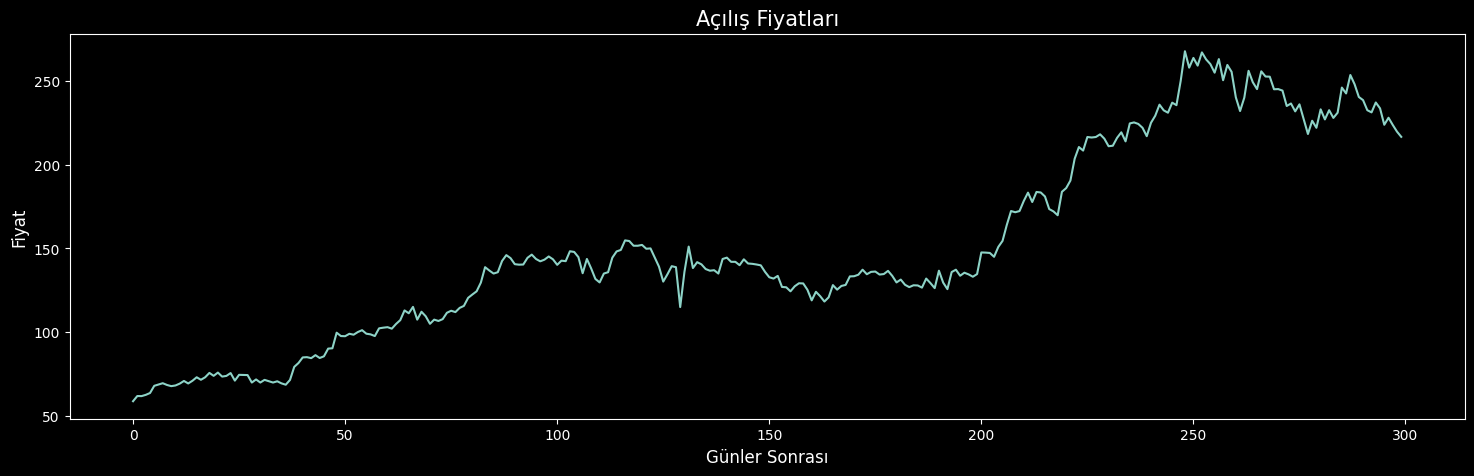

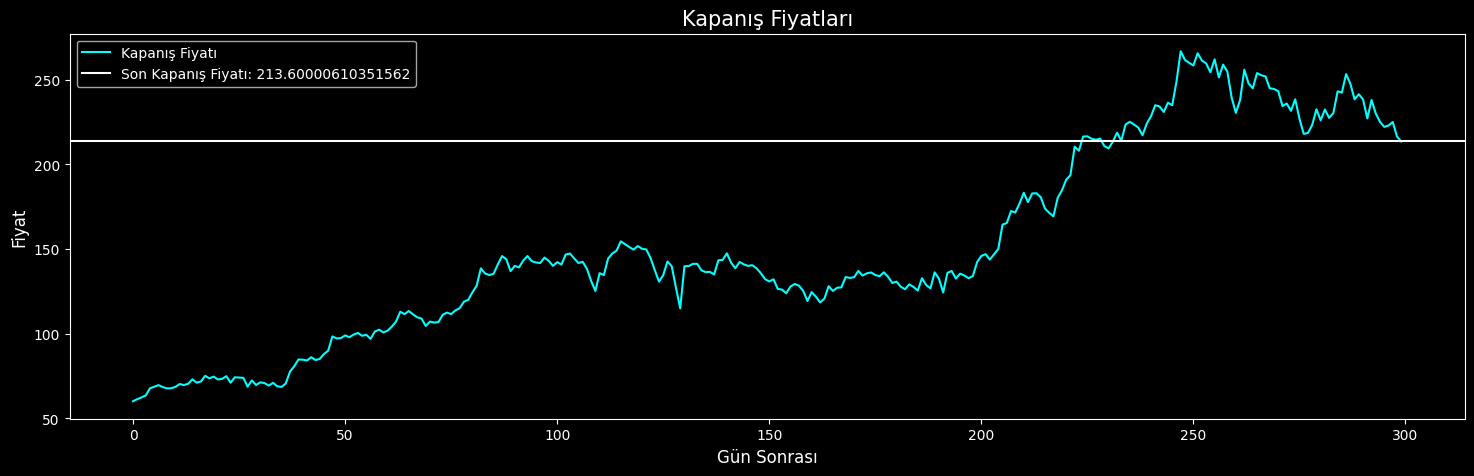

In [9]:
# Klasörü oluştur (varsa geç)
os.makedirs("graphed-results", exist_ok=True)

# Açılış fiyatları grafiği
plt.figure(figsize=(18, 5))
plt.title("Açılış Fiyatları", fontsize=15)
plt.xlabel("Günler Sonrası", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.plot(open_prices)
plt.show()

# Kapanış fiyatları grafiği
plt.figure(figsize=(18, 5))
plt.title("Kapanış Fiyatları", fontsize=15)
plt.xlabel("Gün Sonrası", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.plot(close_prices, 'cyan', label='Kapanış Fiyatı')
last_close_price = close_prices[-1]
plt.axhline(y=last_close_price, label=f'Son Kapanış Fiyatı: {last_close_price}')
plt.legend()

# Grafiği kaydet
plt.savefig("graphed-results/Kapanis Fiyati.png")
plt.show()

In [10]:
len(close_prices)

300

In [11]:
# DataFrame'den 'close' sütununu son 300 öğeyle sınırlayarak 'close_for_calc' değişkenine atama yaptım
close_for_calc = df["close"][-DATA_LEN:]

## Hisse senedinin genel eğilimini tahmin etmek için göstergeler uygulama

### İlk metrik :- Bağıl Güç Endeksi (RSI) 
Kaynak :- https://www.wallstreetmojo.com/relative-strength-index/

In [12]:
# RSI hesaplama
relative_strength_indexs = pta.rsi(close_for_calc, length=14)
relative_strength_indexs = relative_strength_indexs.to_list()

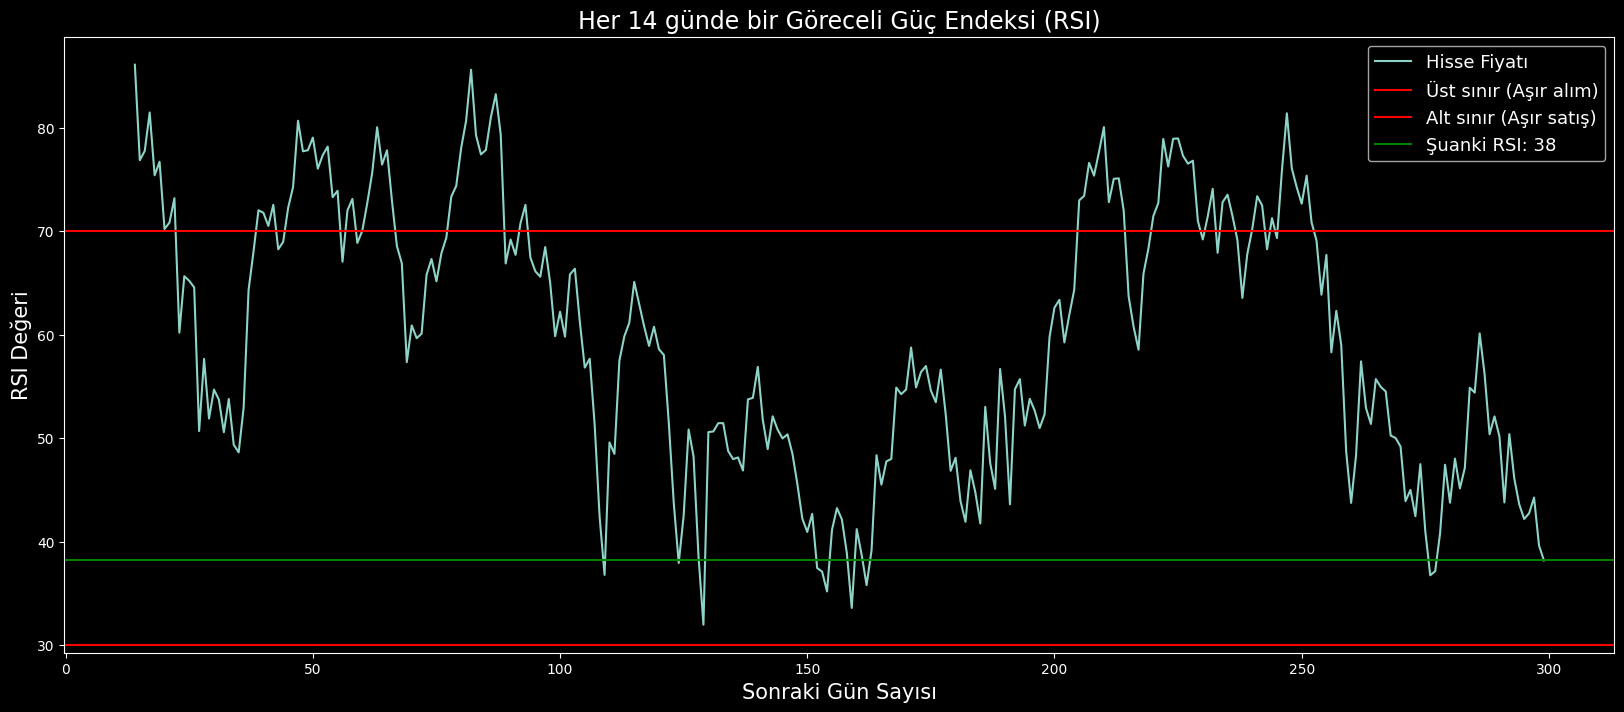

In [13]:
# "graphed-results" klasörünü oluştur (eğer varsa geç)
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
plt.plot(relative_strength_indexs, label='Hisse Fiyatı')
plt.axhline(y=70, color="r", label="Üst sınır (Aşır alım)")
plt.axhline(y=30, color="r", label="Alt sınır (Aşır satış)")
current_rsi = round(relative_strength_indexs[-1])
plt.axhline(y=relative_strength_indexs[-1], color='g', label=f'Şuanki RSI: {current_rsi}')
plt.title("Her 14 günde bir Göreceli Güç Endeksi (RSI)", fontsize=17)
plt.xlabel("Sonraki Gün Sayısı", fontsize=15)
plt.ylabel("RSI Değeri", fontsize=15)
plt.legend(prop={"size": 13})

plt.savefig("graphed-results/RSI.png")
plt.show()


## Bollinger Bantları Oluşturma

### Basit Hareketli Ortalama Denklem + std 2

https://www.wallstreetmojo.com/bollinger-bands/

In [14]:
# 'close_for_calc' listesinin 5 günlük hareketli ortalamasını hesapladım
close_avg = close_for_calc.rolling(5).mean().to_list()

In [15]:
# 'close_for_calc' listesinin 5 günlük hareketli standart sapmasını hesapladım
standart_deviations = close_for_calc.rolling(5).std().to_list()

In [16]:
upper_bollinger_band = []
lower_bollinger_band = []

# 'standart_deviations' listesindeki öğeler üzerinde döngü oluşturdum
for i in range(len(standart_deviations)):
    # Bollinger Bantlarının üst sınırını hesapladım: close_avg + (standart_deviations * 2)
    upper_bound = close_avg[i] + (standart_deviations[i] * 2)
    
    # Bollinger Bantlarının alt sınırını hesapladım: close_avg - (standart_deviations * 2)
    lower_bound = close_avg[i] - (standart_deviations[i] * 2)
    
    # Üst sınırları 'upper_bollinger_band' listesine ekledim
    upper_bollinger_band.append(upper_bound)
    
    # Alt sınırları 'lower_bollinger_band' listesine ekledim
    lower_bollinger_band.append(lower_bound)

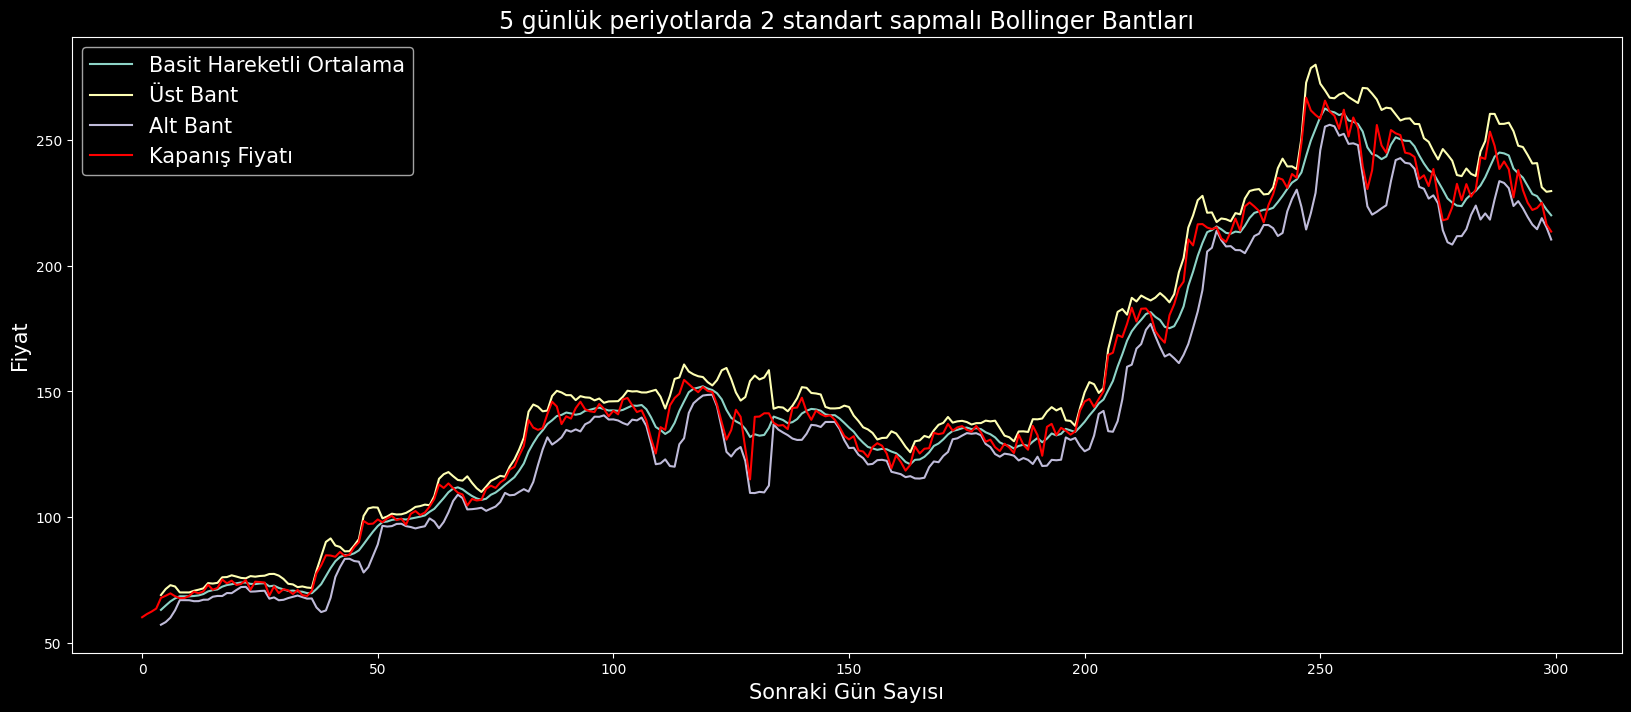

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(close_avg, label="Basit Hareketli Ortalama")
plt.plot(upper_bollinger_band, label="Üst Bant")
plt.plot(lower_bollinger_band, label="Alt Bant")
plt.plot(close_prices, "r", label="Kapanış Fiyatı")
plt.title("5 günlük periyotlarda 2 standart sapmalı Bollinger Bantları", fontsize=17)
plt.xlabel("Sonraki Gün Sayısı", fontsize=15)
plt.ylabel("Fiyat", fontsize=15)
plt.legend(prop={"size": 15})

plt.savefig("graphed-results/SMA+Bollinger Bantları.png")
plt.show()


## OBV (On Balance Volume) : Bakiye Hacmi

https://www.wallstreetmojo.com/on-balance-volume/

In [18]:
on_balance_volumes = []
obv = 0

# Başlangıç değeri olarak OBV'nin (0) 'on_balance_volumes' listesine eklenmesi
on_balance_volumes.append(obv)

# 'volumes' listesindeki öğeler üzerinde dolaşma (index 1'den başlayarak)
for i in range(1, len(volumes)):
    # Eğer mevcut kapanış fiyatı önceki kapanış fiyatından yüksekse,
    if close_prices[i] > close_prices[i - 1]:
        # OBV'yi mevcut hacimle artır
        obv += volumes[i]
        on_balance_volumes.append(obv)
        
    # Eğer mevcut kapanış fiyatı önceki kapanış fiyatından düşükse,
    elif close_prices[i] < close_prices[i - 1]:
        # OBV'yi mevcut hacimden çıkar
        obv -= volumes[i]
        on_balance_volumes.append(obv)
    
    # Eğer mevcut kapanış fiyatı önceki kapanış fiyatına eşitse,
    else:
        # OBV değişmez (OBV'ye 0 ekle)
        obv += 0
        on_balance_volumes.append(obv)

In [19]:
NUM_OF_DAYS_2 = 5

# 'on_balance_volumes' listesini kullanarak 'obv_df' adında bir DataFrame oluşturdum
obv_df = pd.DataFrame(on_balance_volumes)

# 'obv_df' DataFrame'inin NUM_OF_DAYS_2 boyutunda basit hareketli ortalamasını hesapladım
obv_sma = obv_df.rolling(NUM_OF_DAYS_2).mean()

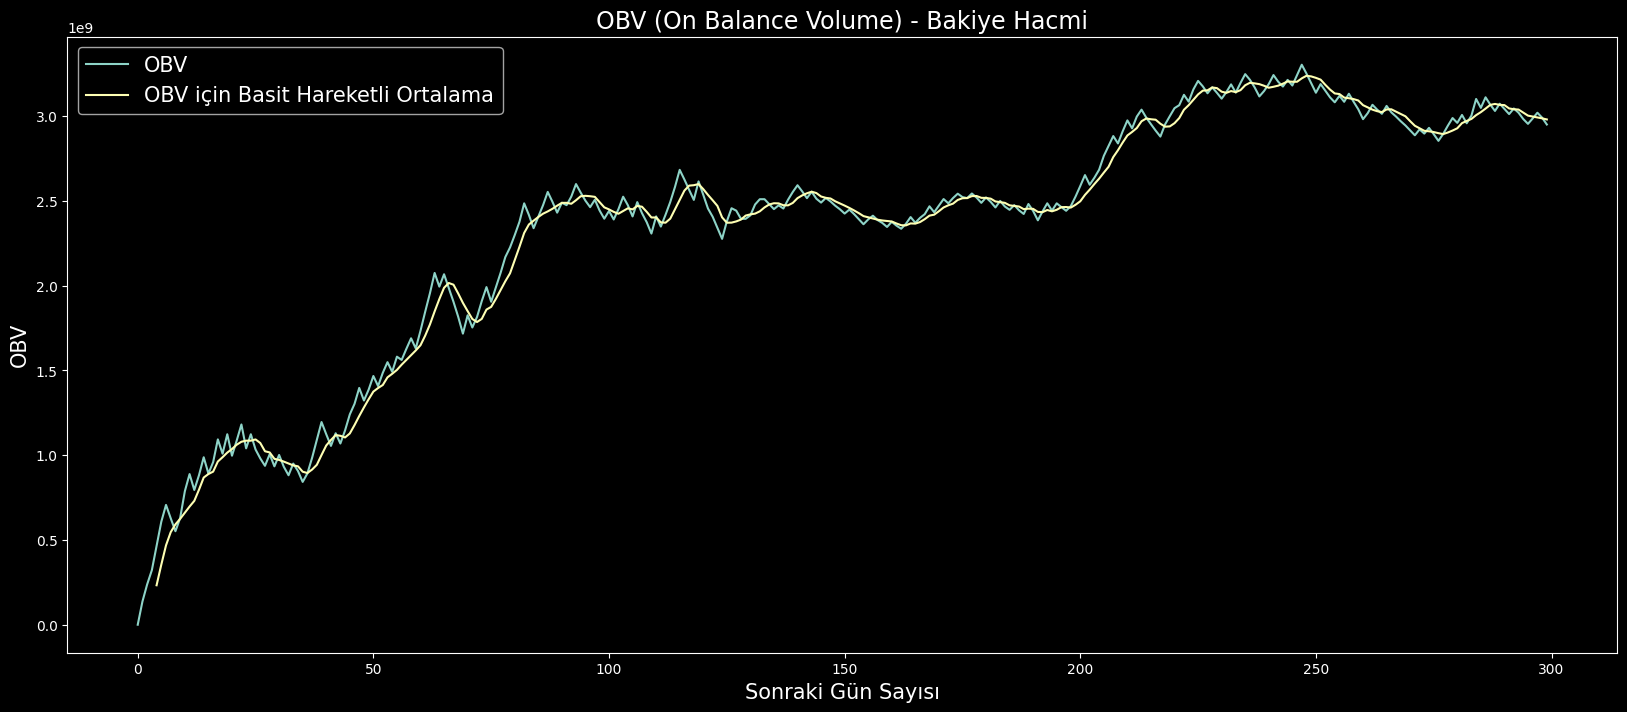

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(on_balance_volumes, label='OBV')
plt.plot(obv_sma, label='OBV için Basit Hareketli Ortalama')
plt.title("OBV (On Balance Volume) - Bakiye Hacmi", fontsize=17)
plt.xlabel("Sonraki Gün Sayısı", fontsize=15)
plt.ylabel("OBV", fontsize=15)
plt.legend(prop={'size': 15})

plt.savefig("graphed-results/SMA(OBV) + OBV.png")
plt.show()

## Implementing MACD (Moving Average Convergence Divergence) Hareketli Ortalama Yakınsama Sapması Uygulama

### MACD için denklem
MACD = 26-Period EMA

https://www.wallstreetmojo.com/moving-average-convergence-divergence/

In [21]:
# 'close_for_calc' için 12 günlük Üssel Hareketli Ortalama (EMA) hesapladım
ema12 = close_for_calc.ewm(span=12, adjust=False).mean()

# 'close_for_calc' için 26 günlük Üssel Hareketli Ortalama (EMA) hesapladım
ema26 = close_for_calc.ewm(span=26, adjust=False).mean()

# MACD'yi ema12'den ema26'yı çıkartarak hesapladım
macd=ema12-ema26

In [22]:
# MACD'nin sinyal hattını, MACD değerlerinin 9 günlük EMA'sını kullanarak hesapladım
signal = macd.ewm(span=9, adjust=False).mean()

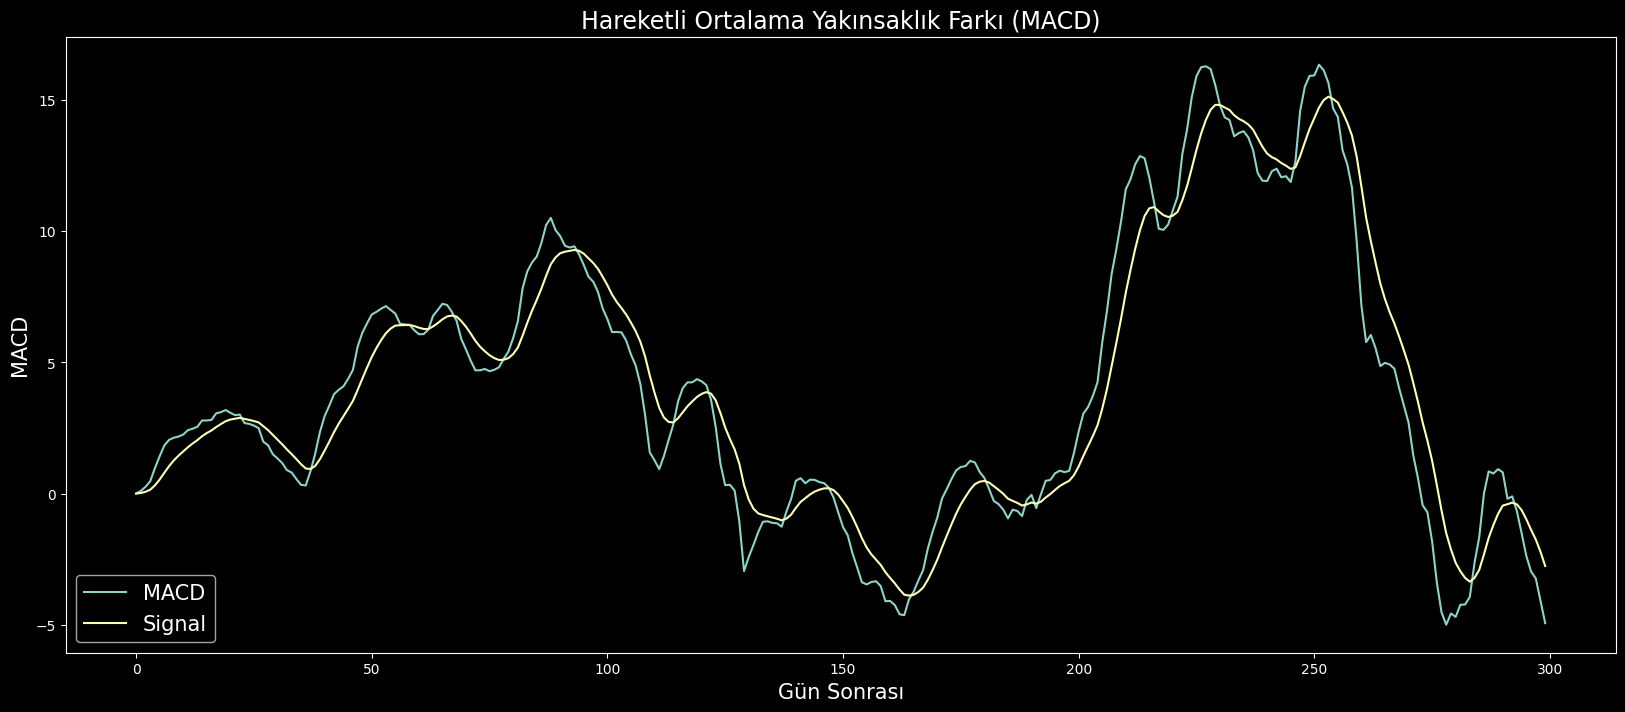

In [23]:
# "graphed-results" klasörünü oluştur (eğer varsa geç)
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
plt.plot(macd.to_list(), label="MACD")
plt.plot(signal.to_list(), label="Signal")
plt.title("Hareketli Ortalama Yakınsaklık Farkı (MACD)", fontsize=17)
plt.ylabel("MACD", fontsize=15)
plt.xlabel("Gün Sonrası", fontsize=15)
plt.legend(prop={'size': 15}, loc='lower left')

# Grafiği 
plt.savefig("graphed-results/MACD.png")
plt.show()

## Momentum

https://www.wallstreetmojo.com/momentum-trading/

In [24]:
MOMENTUM_PERIOD = 10
momentum_values = []

# İndex MOMENTUM_PERIOD'den başlayarak 'close_prices' listesindeki öğelerin üzerinde dolaşma
for i in range(MOMENTUM_PERIOD, len(close_prices)):
    # Mevcut kapanış fiyatını al
    curr_close_price = close_prices[i]

    # Dönem başlangıcındaki kapanış fiyatını aldım
    period_start_close_price = close_prices[i - MOMENTUM_PERIOD]

    # Momentum değerini, mevcut kapanış fiyatından dönem başlangıcındaki kapanış fiyatını çıkararak hesapladım
    momentum_values.append(curr_close_price - period_start_close_price)

In [25]:
# Ortalama momentumun hesaplanması
momentum_sum = 0

# 'momentum_values' listesindeki öğelerin üzerinde dolaşma
for i in range(len(momentum_values)):
    # Mevcut momentum değerini momentum toplamına ekledim
    momentum_sum += momentum_values[i]

# Ortalama momentumu, momentum toplamını momentum değerlerinin sayısına bölerek hesapladım
avg_momentum = momentum_sum / len(momentum_values)

# Ortalama momentumu yazdır
print(f"Ortalama Momentum: {avg_momentum}")

Ortalama Momentum: 5.522413845719962


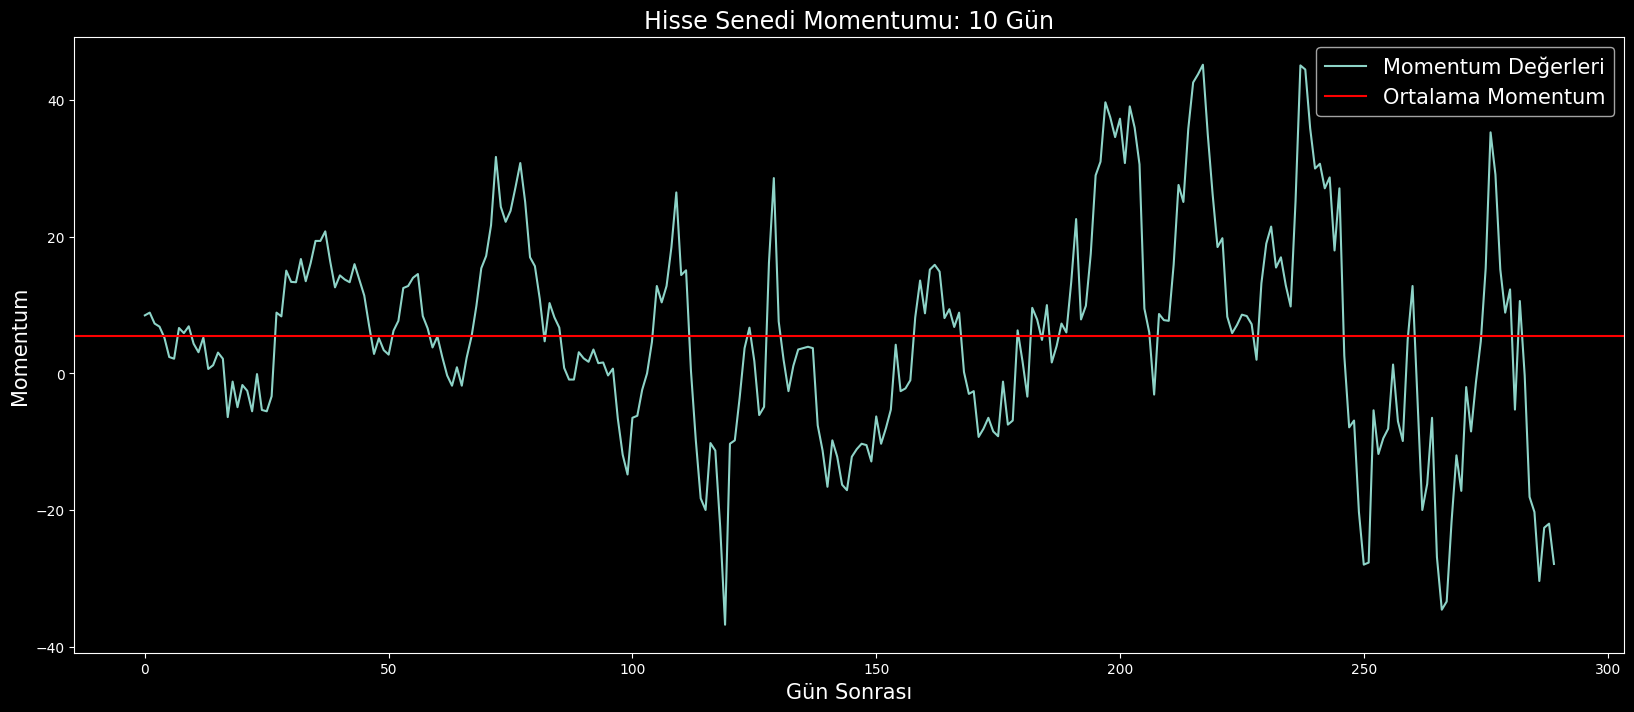

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(momentum_values, label='Momentum Değerleri')
plt.axhline(y=avg_momentum, label='Ortalama Momentum', color='r')
plt.title(f"Hisse Senedi Momentumu: {MOMENTUM_PERIOD} Gün", fontsize=17)
plt.xlabel("Gün Sonrası", fontsize=15)
plt.ylabel("Momentum", fontsize=15)
plt.legend(prop={'size': 15})

plt.savefig("graphed-results/Momentum.png")
plt.show()


## Direnç ve Destek Hatları

Direnç => https://www.wallstreetmojo.com/resistance/

In [27]:
type(close_prices)

list

## Pivot Noktası = (Önceki Oturum Yüksek + Önceki Oturum Düşük + Önceki Oturum Kapanışı)/3 denklemini kullanarak pivotları hesaplama

https://www.wallstreetmojo.com/pivot-point/

In [28]:
pivot_points = []

# 'close_for_calc' listesindeki öğelerin üzerinde dolaşma
for i in range(len(close_for_calc)):
    if i == 0:
        # İlk öğe için, pivot_points listesine NaN (Sayı Değil) ekledim
        pivot_points.append(float("nan"))
    else:
        # Önceki yüksek, düşük ve kapanış fiyatlarını aldım
        prev_high = high_prices[i - 1]
        prev_low = low_prices[i - 1]
        prev_close = close_prices[i - 1]

        # Pivot noktasını, (önceki yüksek + önceki düşük + önceki kapanış) / 3 formülünü kullanarak hesapladım
        pivot_point = (prev_high + prev_low + prev_close) / 3

        # Pivot noktasını pivot_points listesine ekledim
        pivot_points.append(pivot_point)

### Aşağıdaki denklemleri kullanarak Direnç ve Destek seviyelerini hesaplama 


##### Direnç Seviyesi 1 = (2 x Pivot Noktası) – Önceki Oturum Düşük
##### Destek Seviyesi 1 – (2 x Pivot Noktası) – Önceki Yüksek
##### Direnç Seviyesi 2 = (Pivot Noktası – Destek Seviyesi 1) + Direnç Seviyesi 1
##### Destek Seviyesi 2 = Pivot Noktası – (Direnç Seviyesi 1 – Destek Seviyesi 1)
##### Direnç Seviyesi 3 = (Pivot Noktası – Destek Seviyesi 2) + Direnç Seviyesi 2
##### Destek Seviyesi 3 = Pivot Noktası – (Direnç Seviyesi 2 – Destek Seviyesi 2)


https://www.quora.com/What-is-the-actual-formula-used-to-find-the-support-and-resistance

In [29]:
resistance_1 = []
support_1 = []
resistance_2 = []
support_2 = []

# 'pivot_points' listesindeki öğelerin üzerinde dolaşma
for i in range(len(pivot_points)):
    if i == 0:
        # İlk öğe için, resistance_1 ve support_1 listelerine NaN (Sayı Değil) ekledim
        resistance_1.append(float("nan"))
        support_1.append(float("nan"))
    else:
        # İlk direnç (r1) ve destek (s1) seviyelerini hesapladım
        r1 = (2 * pivot_points[i] - low_prices[i - 1])
        s1 = (2 * pivot_points[i] - high_prices[i - 1])

        # İkinci direnç (r2) ve destek (s2) seviyelerini hesapladım
        r2 = (pivot_points[i] - s1) + r1
        s2 = pivot_points[i] - (r1 - s1)

        # Hesaplanan değerleri ilgili listelere ekledim
        resistance_1.append(r1)
        support_1.append(s1)
        resistance_2.append(r2)
        support_2.append(s2)

In [30]:
print(type(support_1))
print(len(close_prices))

<class 'list'>
300


In [31]:
first_support_cross_counter = 0

# 'support_1' seviyesinin kapanış fiyatını yukarı kestiği zamanları say
for i in range(len(support_1)):
    if support_1[i] > close_prices[i]:
        first_support_cross_counter += 1

print(f"İlk Destek Seviyesi Kapanışı Üst Geçen Gün Sayısı: {first_support_cross_counter}")

İlk Destek Seviyesi Kapanışı Üst Geçen Gün Sayısı: 72


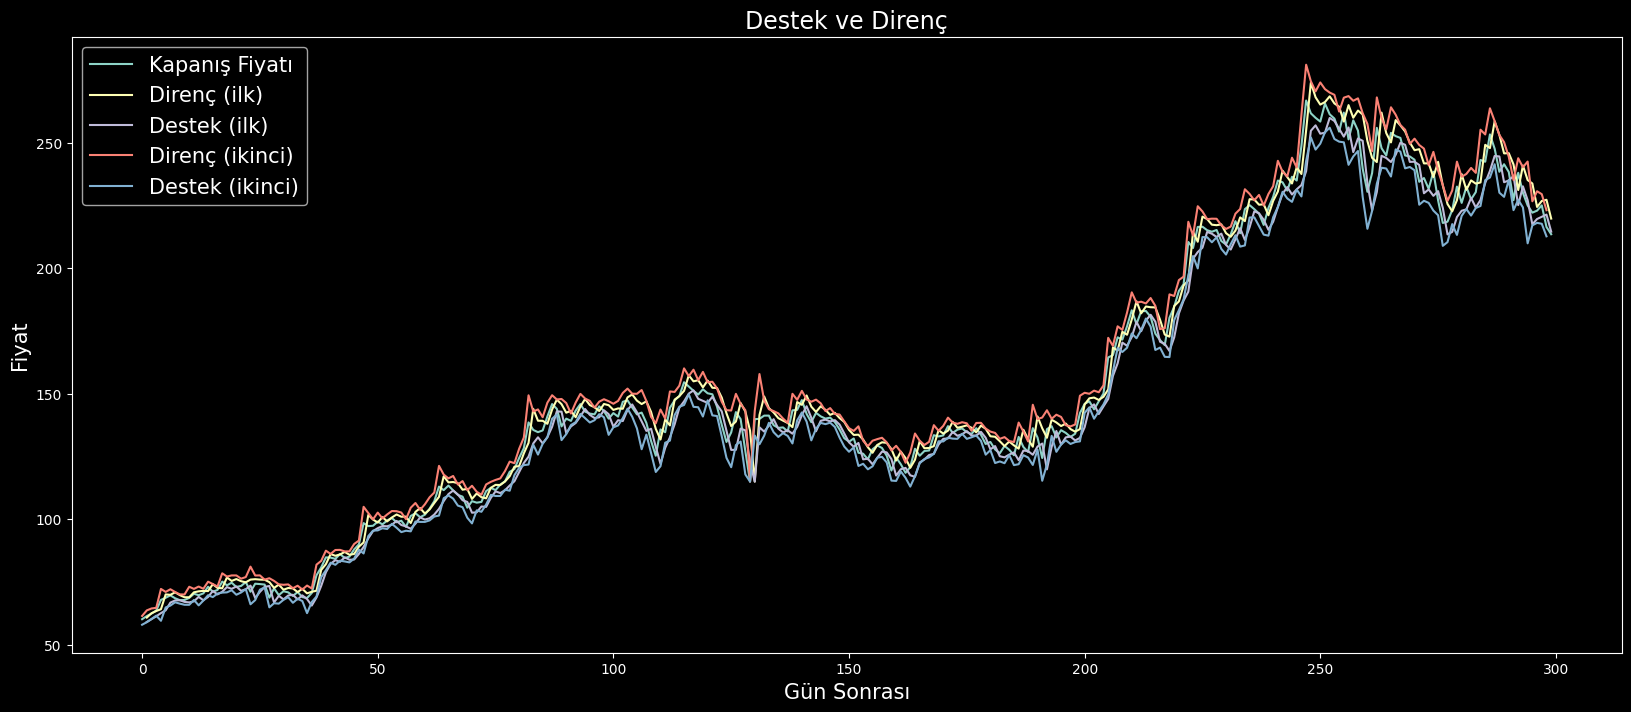

In [32]:
plt.figure(figsize=(20, 8))
plt.plot(close_prices, label='Kapanış Fiyatı')
plt.plot(resistance_1, label='Direnç (ilk)')
plt.plot(support_1, label='Destek (ilk)')
plt.plot(resistance_2, label='Direnç (ikinci)')
plt.plot(support_2, label='Destek (ikinci)')
plt.xlabel("Gün Sonrası", fontsize=15)
plt.ylabel("Fiyat", fontsize=15)
plt.title("Destek ve Direnç", fontsize=17)
plt.legend(prop={'size': 15})

plt.savefig("graphed-results/Destek ve Direnç.png")
plt.show()

## Gelecek hisse senedi fiyatı tahmin etmek için Neural Network kullanalım

In [33]:
dataset=close_prices
dataset=np.array(dataset)

In [34]:
training=len(dataset)

In [35]:
dataset=np.reshape(dataset,(dataset.shape[0],1))

In [36]:
print(dataset.shape)

(300, 1)


In [37]:
scaler=MinMaxScaler(feature_range=(0,1))

In [38]:
# MinMaxScaler kullanarak 'dataset'i ölçeklendirdim
scaled_data=scaler.fit_transform(dataset)

In [39]:
# 'train_data' değişkenini ölçeklendirilmiş verilere ayarladım
train_data=scaled_data

In [40]:
print(len(train_data))

300


In [41]:
x_train = []
y_train = []
prediction_days = 60

# 'prediction_days' indeksinden başlayarak train_data üzerinde dolaş
for i in range(prediction_days, len(train_data)):
    # Önceki 'prediction_days' veri noktalarını özellik olarak ekledim
    x_train.append(train_data[i - prediction_days:i, 0])

    # Mevcut veri noktasını etiket olarak ekledim
    y_train.append(train_data[i, 0])

# Listeleri NumPy dizilerine dönüştürdüm
x_train, y_train = np.array(x_train), np.array(y_train)

# Giriş verisini LSTM modelinin giriş şekline uyacak şekilde yeniden şekillendirdim
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [42]:
print(x_train.shape)

(240, 60, 1)


##  LSTM Yaklaşımı

In [43]:
from tensorflow import keras

model_rnn = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(units=75, return_sequences=True, input_shape=(x_train.shape[1], 1))),
    keras.layers.Bidirectional(keras.layers.LSTM(units=64)),
    keras.layers.Dense(300),
    keras.layers.Dense(32),
    keras.layers.Dense(1),
])

In [44]:
# Erken durdurma geri çağrısı ekledim
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss",   # İzlenen metrik (loss)
    min_delta=0.0008,  # Minimum değişim
    patience=3,        # Sabır seviyesi (kaç epoch sabretmeli)
)

# Modeli derledim
model_rnn.compile(optimizer="adam", loss="mse")

# Modeli eğittim
history = model_rnn.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=5,
    callbacks=[early_stopping]  # Erken durdurma geri çağrısı ekledim
)

Epoch 1/20


48/48 [==============================] - 6s 22ms/step - loss: 0.0327
Epoch 2/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0034
Epoch 3/20
48/48 [==============================] - 1s 21ms/step - loss: 0.0038
Epoch 4/20
48/48 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 5/20
48/48 [==============================] - 1s 21ms/step - loss: 0.0021
Epoch 6/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 7/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 8/20
48/48 [==============================] - 1s 23ms/step - loss: 0.0030


## Transformer Yaklaşımı

Küçük zaman dilimlerinde gerçekleşen fiyat hareketlerine dikkat ederek oynaklık sorununu çözmeye çalıştım

In [45]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = keras.layers.Dropout(dropout)(x)
    res = x + inputs
    x = keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks): 
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = keras.layers.Dense(dim, activation="elu")(x)
        x = keras.layers.Dropout(mlp_dropout)(x)
    outputs = keras.layers.Dense(1, activation="linear")(x)  
    return keras.Model(inputs, outputs)

# Giriş verisinin şekli
input_shape = x_train.shape[1:]

In [46]:
# Geri çağrılar
callbacks = [keras.callbacks.EarlyStopping(patience=3)]

# Model
model = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=7,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mean_squared_error"],
)

history = model.fit(
    x_train,
    y_train,
    validation_split=0.01,
    epochs=10,
    batch_size=32,
    callbacks=callbacks,
)


Epoch 1/10
8/8 [==============================] - 21s 2s/step - loss: 0.6478 - mean_squared_error: 0.6478 - val_loss: 0.4763 - val_mean_squared_error: 0.4763
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.2327 - mean_squared_error: 0.2327 - val_loss: 0.9820 - val_mean_squared_error: 0.9820
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1391 - val_mean_squared_error: 0.1391


In [47]:
model.save("transformer-model-v1.1/")

INFO:tensorflow:Assets written to: transformer-model-v1.1/assets


INFO:tensorflow:Assets written to: transformer-model-v1.1/assets


## Transformer Tahminleri

In [48]:
# Test verisi, ölçeklendirilmiş veriye eşitlendirdim
test_data = scaled_data

# Test verisi için özellik ve etiketleri hazırlandım
x_test = []
y_test = []

# Prediction_days sayısı kadar veriye dayalı özellikler ve etiketler oluşturdum
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i - prediction_days:i, 0])
    y_test.append(test_data[i, 0])


x_test = np.array(x_test)

print("x_test.shape:", x_test.shape)

x_test.shape: (240, 60)


In [49]:
# Test verisinin şeklini uygun hale getirdim
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Eğitilmiş modeli kullanarak tahminler yaptım
transformer_predictions = model.predict(x_test)

8/8 [==============================] - 6s 677ms/step


In [50]:
# Ölçeklendirilmiş tahminleri ters dönüşüm yaparak gerçek değerlere dönüştürdüm
transformer_predictions = scaler.inverse_transform(transformer_predictions)

In [51]:
y_test=np.array(y_test)

In [52]:
type(y_test)

numpy.ndarray

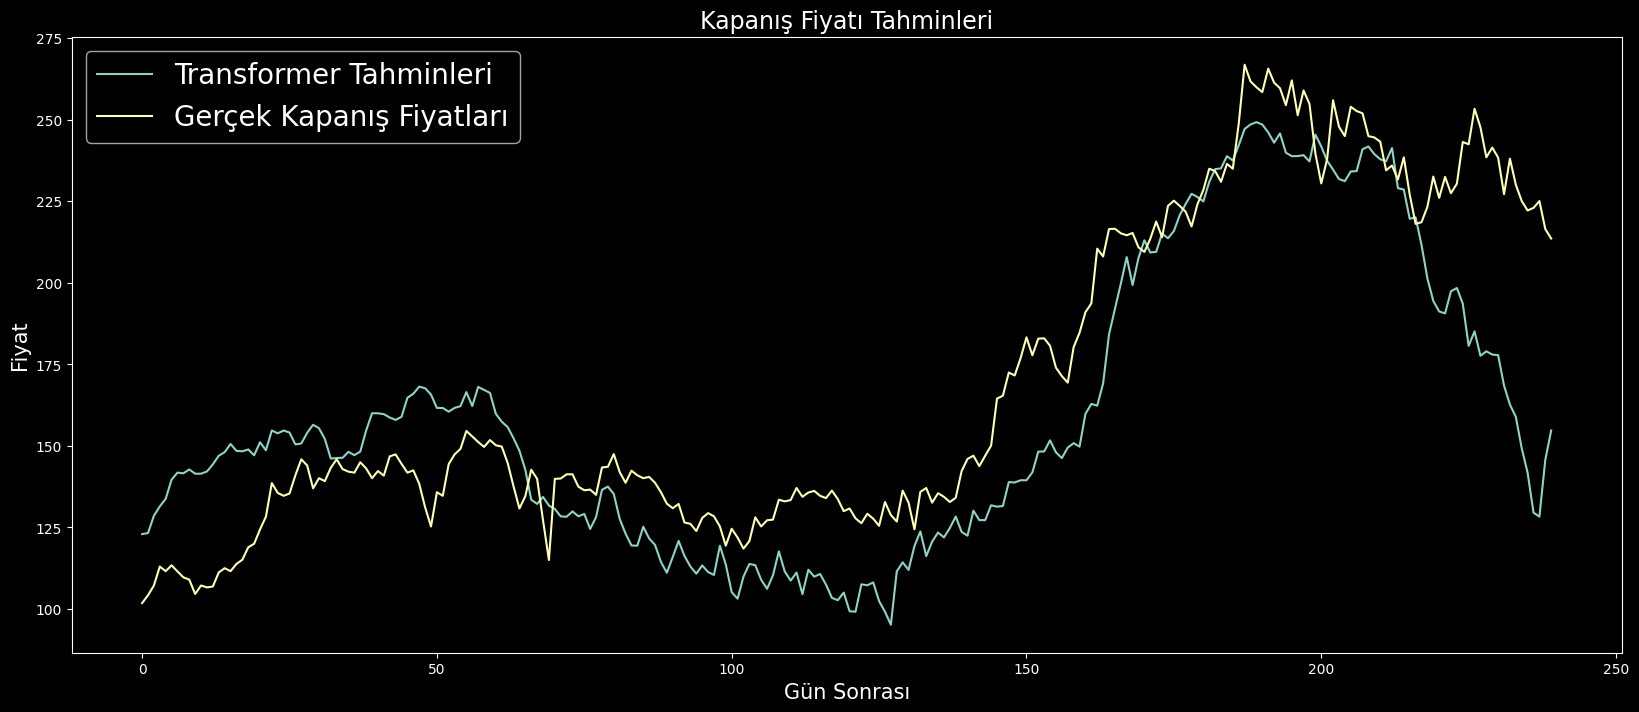

In [53]:
# Tahminleri ve gerçek kapanış fiyatlarını çizdirdim
plt.figure(figsize=(20, 8))
plt.plot(transformer_predictions, label="Transformer Tahminleri")
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label="Gerçek Kapanış Fiyatları")
plt.title("Kapanış Fiyatı Tahminleri", fontsize=17)
plt.xlabel("Gün Sonrası", fontsize=15)
plt.ylabel("Fiyat", fontsize=15)
plt.legend(prop={"size": 20})
plt.show()


## Transformer Gelecek Tahminleri

In [54]:
# Mevcut fiyat verisini aldım
curr_price = close_prices[-prediction_days:]

# Numpy dizisine dönüştür ve yeniden şekillendirdim
curr_price = np.array(curr_price).reshape(-1, 1)

# Eğitim verilerinde kullanılan ölçekleyiciyi kullanarak mevcut fiyatı ölçeklendirdim
curr_price = scaler.transform(curr_price)

# Model için uygun giriş şekline dönüştürdüm
curr_price = curr_price.reshape(1, prediction_days, 1)

In [55]:
next_day_pred=model.predict(curr_price)
next_day_pred=scaler.inverse_transform(next_day_pred)

1/1 [==============================] - 0s 41ms/step


In [56]:
# Tahmin yapmak için mevcut fiyat verisini aldım
curr_price = close_prices[-prediction_days:]

# Tahmin için yeterli veri olup olmadığını kontrol et
if len(curr_price) < prediction_days:
    print("Yeterli veri yok.")
else:
    transformer_pred_prices = []  # Tahmin edilen fiyatları saklamak için bir liste
    NUM_OF_FUTURE_DAYS = 10
    transformer_tot_close_prices = list(close_prices)

    for i in range(NUM_OF_FUTURE_DAYS + 1):
        curr_price = transformer_tot_close_prices[-prediction_days:]  # Mevcut veriyi aldım
        if len(curr_price) < prediction_days:
            print("Yeterli veri yok.")
            break
        else:
            curr_price = np.array(curr_price)
            curr_price = scaler.transform(curr_price.reshape(-1, 1))
            curr_price = curr_price.reshape(1, prediction_days, 1)
            next_day_pred = model.predict(curr_price)
            next_day_pred = scaler.inverse_transform(next_day_pred)
            transformer_pred_prices.append(next_day_pred)
            transformer_tot_close_prices.append(next_day_pred)

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 33ms/step


C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

1/1 [==============================] - ETA: 0s

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

1/1 [==============================] - ETA: 0s

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

1/1 [==============================] - 0s 47ms/step


C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_10484\932362662.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  curr_price = np.array(curr_price)


In [57]:
# Tahmin edilen fiyatların listesini bir numpy dizisine dönüştürdüm
pred_prices = np.array(transformer_pred_prices)

# Tahmin edilen fiyatları istenen şekle yeniden şekillendirdim
pred_prices = np.reshape(pred_prices, (pred_prices.shape[0]))

c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


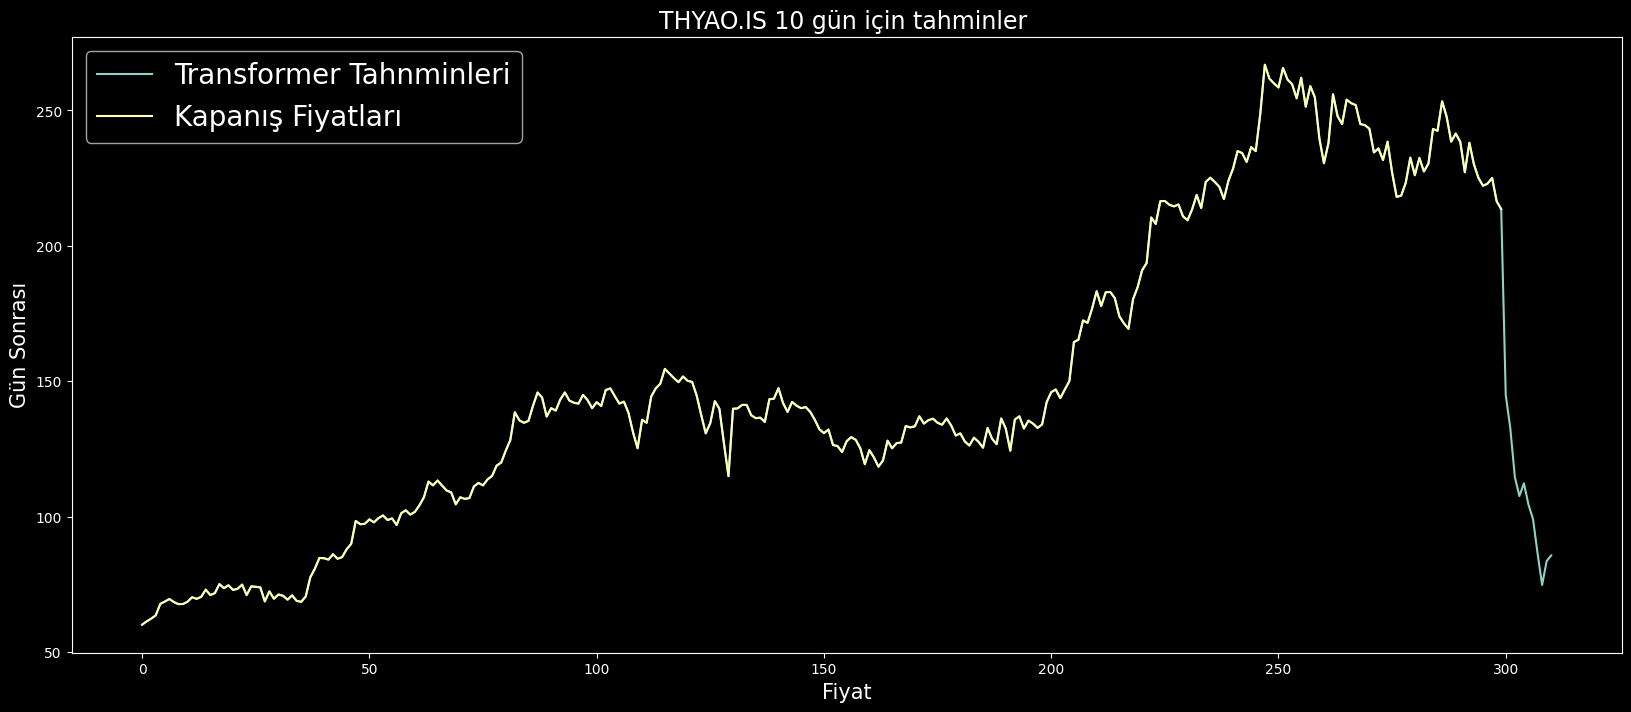

In [58]:
plt.figure(figsize=(20,8))
plt.plot(transformer_tot_close_prices,label="Transformer Tahnminleri")
plt.plot(close_prices,label="Kapanış Fiyatları")
plt.title(f"{ticker} {NUM_OF_FUTURE_DAYS} gün için tahminler ",fontsize=17)
plt.xlabel("Fiyat",fontsize=15)
plt.ylabel("Gün Sonrası",fontsize=15)
plt.legend(prop={"size":20})
plt.show()

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 60, 1)                2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 60, 1)                19321     ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

## RNN (Recurrent Neural Networks) Yinelemeli sinir ağı Gelecek Tahminleri

In [60]:
# Ölçeklendirilmiş verileri test_data değişkenine atadım
test_data = scaled_data

# Test verisi için özellik ve etiketleri hazırladım
x_test = []
y_test = []

# Test verisi için özellik ve etiket dizilerini oluşturdum
for i in range(prediction_days, len(test_data)):
    
    # Önceki 'prediction_days' günlük verileri özellik olarak ekledim
    x_test.append(test_data[i - prediction_days:i, 0])

    # Karşılık gelen kapanış fiyatlarını etiket olarak ekledim
    y_test.append(test_data[i, 0])

In [61]:
# Giriş ve çıkış dizilerini numpy dizilerine dönüştürdüm
x_test=np.array(x_test)
y_test=np.array(y_test)

In [62]:
# Giriş dizilerini istenen şekle yeniden şekillendirdim
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [63]:
# Test verileri üzerinde tahminler yaptım
predictions=model_rnn.predict(x_test)

8/8 [==============================] - 2s 18ms/step


In [64]:
# Tahmin edilen değerleri gerçek fiyatları elde etmek için ters ölçeklendirdim
predictions=scaler.inverse_transform(predictions)

In [65]:
y_test=np.array(y_test)

In [66]:
print(predictions[0:5])

[[113.81961 ]
 [114.39425 ]
 [115.33848 ]
 [116.73802 ]
 [119.073906]]


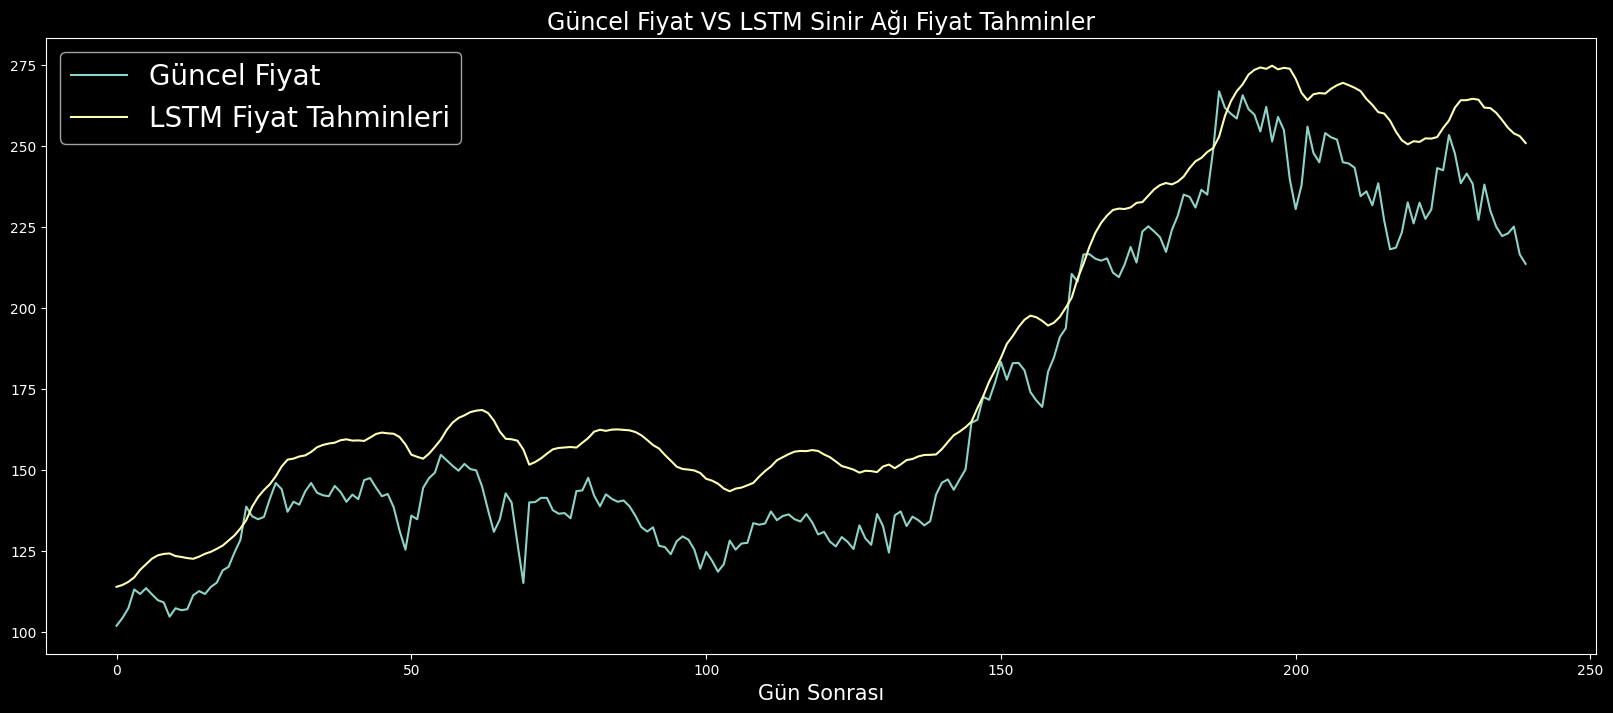

In [67]:
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label="Güncel Fiyat")
plt.plot(predictions, label='LSTM Fiyat Tahminleri')
plt.title("Güncel Fiyat VS LSTM Sinir Ağı Fiyat Tahminler",fontsize=17)
plt.xlabel("Gün Sonrası",fontsize=15)
plt.legend(prop={"size":20})
plt.show()

In [68]:
# Orijinal veri setinden son `prediction_days` sayısındaki kapanış fiyatlarını aldım
curr_price = close_prices[-prediction_days:]

# `curr_price` listesini bir numpy dizisine dönüştürdüm
curr_price = np.array(curr_price)

# `curr_price` dizisini ölçeklemek için beklenen şekle getirdim
curr_price = scaler.transform(curr_price.reshape(-1, 1))

In [69]:
# `curr_price` dizisini modele uygun giriş şekline dönüştürdüm
curr_price = np.reshape(curr_price, (curr_price.shape[0], curr_price.shape[1], 1))

In [70]:
# RNN modelini kullanarak `curr_price` üzerinde tahminler yaptırdım
next_day_pred=model_rnn.predict(curr_price)

2/2 [==============================] - 2s 3ms/step


In [71]:
# Tahmin edilen değerleri orijinal ölçeklerine geri dönüştürdüm
next_day_pred=scaler.inverse_transform(next_day_pred)

In [72]:
print(close_prices[len(close_prices)-1])
print(next_day_pred[0][0])

213.60000610351562
111.95254


In [73]:
# Tahmin için kullanılacak gün sayısı
prediction_days = 60

# Mevcut kapanış fiyatlarını aldım
current_prices = close_prices[-prediction_days:]

# NumPy dizisine dönüştürdüm
current_prices = np.array(current_prices)

# Mevcut fiyatları ölçeklendirdim
scaled_prices = scaler.transform(current_prices.reshape(-1, 1))

# Model için giriş şekline uyacak şekilde yeniden şekillendirdim
input_data = np.reshape(scaled_prices, (1, scaled_prices.shape[0], 1))

# RNN modeli ile bir sonraki gün için tahmin yaptım
predicted_price = model_rnn.predict(input_data)

# Tahmin edilen fiyatı orijinal ölçeğe geri dönüştürdüm
predicted_price = scaler.inverse_transform(predicted_price)

# Mevcut fiyatı ve bir sonraki gün için tahmin edilen fiyatı yazdırdım
print("Mevcut Fiyat:", close_prices[-1])
print("Ertesi Gün için Tahmini Fiyat:", predicted_price[0][0])

1/1 [==============================] - 0s 27ms/step
Mevcut Fiyat: 213.60000610351562
Ertesi Gün için Tahmini Fiyat: 248.62808


In [74]:
# Belirtilen gün sayısı için gelecekteki fiyatları tahmin ettirdim
pred_prices=[]
NUM_OF_FUTURE_DAYS=15
tot_close_prices=list(close_prices)

for i in range(NUM_OF_FUTURE_DAYS+1):
    
    # Tahmin için mevcut fiyatı aldım
    curr_price=tot_close_prices[len(tot_close_prices)-prediction_days: len(tot_close_prices)]

    # Mevcut fiyatı NumPy dizisine dönüştürdüm
    curr_price=np.array(curr_price) 

    # Mevcut fiyatı eğitim sırasında kullanılan aralığa yeniden ölçeklendirdim
    curr_price=scaler.transform(curr_price.reshape(-1,1))
    
    # Mevcut fiyatın modelin giriş şekline uyacak şekilde yeniden şekillendirdim
    curr_price=np.reshape(curr_price,(1,curr_price.shape[0],1)) 

    # RNN modelini kullanarak mevcut fiyat üzerinde tahminler yaptım
    next_day_pred=model_rnn.predict(curr_price) 
    
    # Tahmin edilen değeri orijinal ölçeğine geri dönüştürdüm
    next_day_pred=scaler.inverse_transform(next_day_pred) 
    
    # Tahmin edilen fiyatı tahmin edilen fiyatların listesine ekledim
    pred_prices.append(next_day_pred)

    # Tahmin edilen fiyatı toplam kapanış fiyatlarının listesine ekledim
    tot_close_prices.append(next_day_pred[0][0])

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


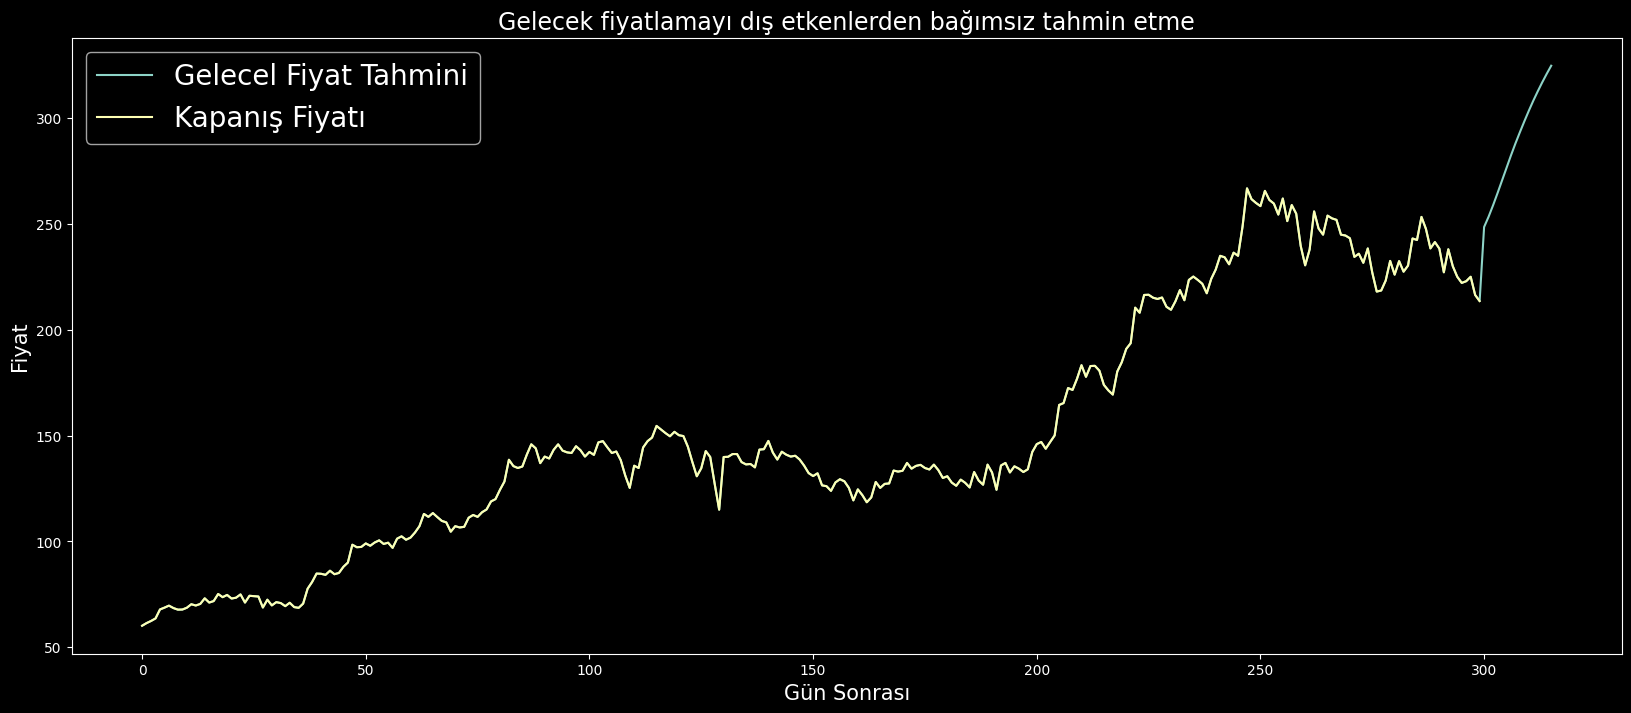

In [75]:
plt.figure(figsize=(20,8))
plt.plot(tot_close_prices,label="Gelecel Fiyat Tahmini")
plt.plot(close_prices,label="Kapanış Fiyatı")
plt.title("Gelecek fiyatlamayı dış etkenlerden bağımsız tahmin etme",fontsize=17)
plt.xlabel("Gün Sonrası",fontsize=15)
plt.ylabel("Fiyat",fontsize=15)
plt.legend(prop={"size":20})
plt.savefig(f"graphed-results/{NUM_OF_FUTURE_DAYS} gün boyunca gelecek trendi")
plt.show()

## Gelecekteki fiyatı tahmin etmek için Doğrusal Regresyon Modeli

In [76]:
# x_train'i istenen şekle dönüştürdüm
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]))

In [77]:
# Doğrusal Regresyon modelini eğittirdim
reg=LinearRegression().fit(x_train,y_train)

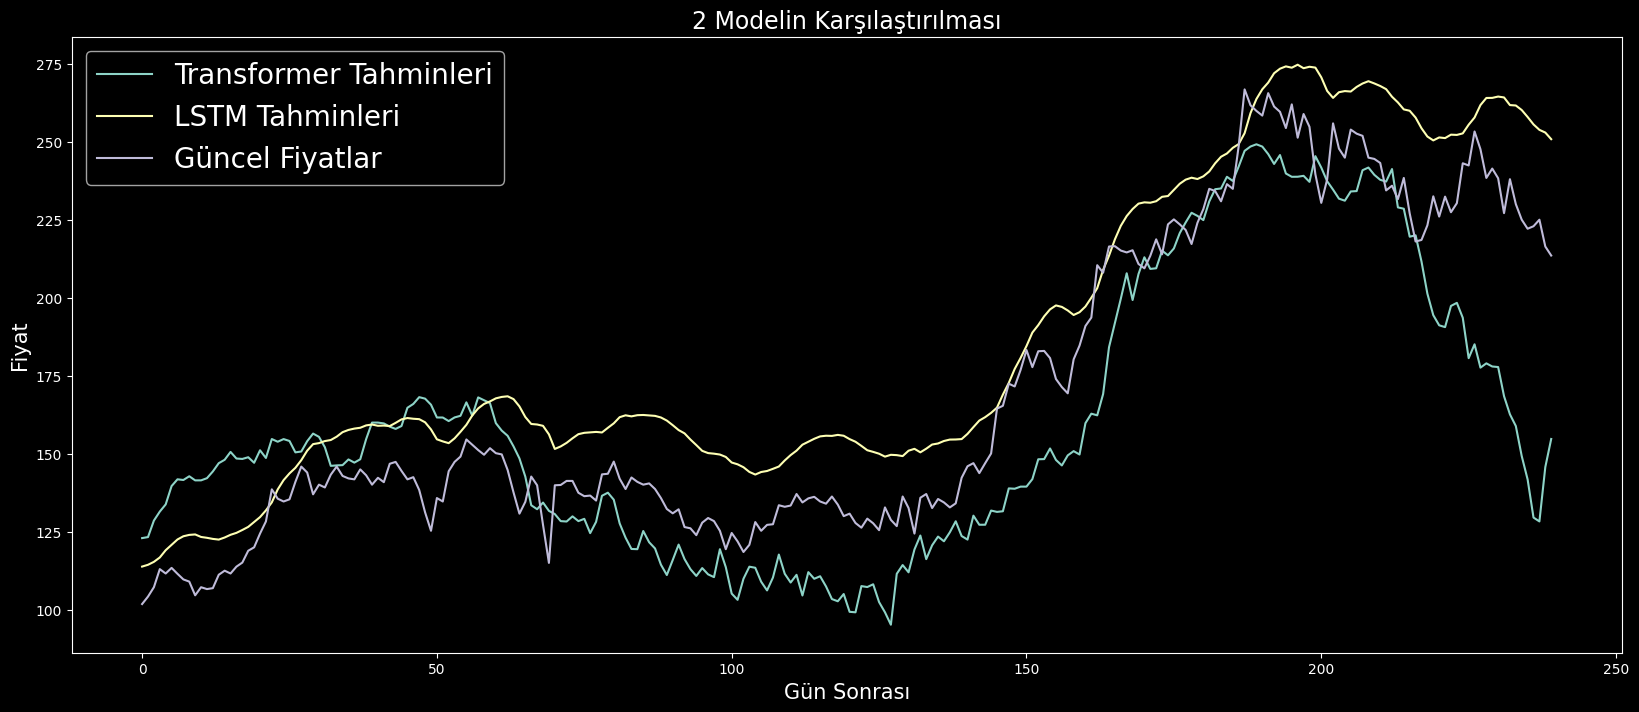

In [78]:
plt.figure(figsize=(20,8))
plt.plot(transformer_predictions,label="Transformer Tahminleri")
plt.plot(predictions,label="LSTM Tahminleri")
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label="Güncel Fiyatlar")
plt.legend(prop={"size":20})
plt.xlabel("Gün Sonrası",fontsize=15)
plt.ylabel("Fiyat",fontsize=15)
plt.title("2 Modelin Karşılaştırılması",fontsize=17)
plt.savefig("graphed-results/2 Modelin Karşılaştırılması")
plt.show()

### Hisse senedinin tahmin günleri süresince volatilitesini hesaplayarak gürültü olarak uyguladım

In [79]:
# Volatilite hesaplama periyodu
volatility_calc_period = 60
price_sum = 0

# Volatilite hesaplama periyodu için fiyatların toplamını hesaplattırdım
for i in range(len(close_prices) - volatility_calc_period, len(close_prices)):
    price_sum += close_prices[i]

# Ortalama fiyatı hesaplattırdım
price_avg = price_sum / volatility_calc_period

print(price_avg)

240.278333791097


In [80]:
# Karelerin listesini depolamak için
diffs = []

# Volatilite hesaplama periyodu için kare farkları hesapladım
for i in range(len(close_prices) - volatility_calc_period, len(close_prices)):
    diffs.append(pow(close_prices[i] - price_avg, 2))

# Listeyi NumPy dizisine dönüştürdüm
diffs = np.array(diffs)

# Kare farkların toplamını hesapladım
diffs_sum = np.sum(diffs)

In [81]:
# Varyansı hesapladım
variance = diffs_sum / volatility_calc_period

# Standart sapmayı hesapladım
standard_deviation = math.sqrt(variance)

print(standard_deviation)

13.611245315568397


### Belirtilen süre boyunca verilerin standart sapmasına dayalı gürültü oluşturma

In [82]:
# Gürültülü tahmin edilen fiyatları depolamak için liste oluşturdum
pred_prices_noisy = []

# Gürültü için alt sınırı hesapladım
lower_bound = int(round(0.3 * standard_deviation))

for i in range(len(pred_prices)):
    # Alt sınıra ve standart sapma aralığına göre rastgele gürültü oluşturdum
    noise = random.randint(lower_bound, round(standard_deviation))
    
    # Gürültüyü tahmin edilen fiyata ekle ve gürültülü tahminler listesine ekledim
    pred_prices_noisy.append(pred_prices[i] + noise)

In [83]:
# Listeyi NumPy dizisine dönüştürdüm
pred_prices_noisy = np.array(pred_prices_noisy)

# Diziyi tek boyutlu hale getirdim
pred_prices_noisy = np.reshape(pred_prices_noisy, (pred_prices_noisy.shape[0]))

In [84]:
# Orijinal tahminler listesini NumPy dizisine dönüştürdüm
pred_prices = np.array(pred_prices)

# Diziyi tek boyutlu hale getirdim
pred_prices = np.reshape(pred_prices, (pred_prices.shape[0]))

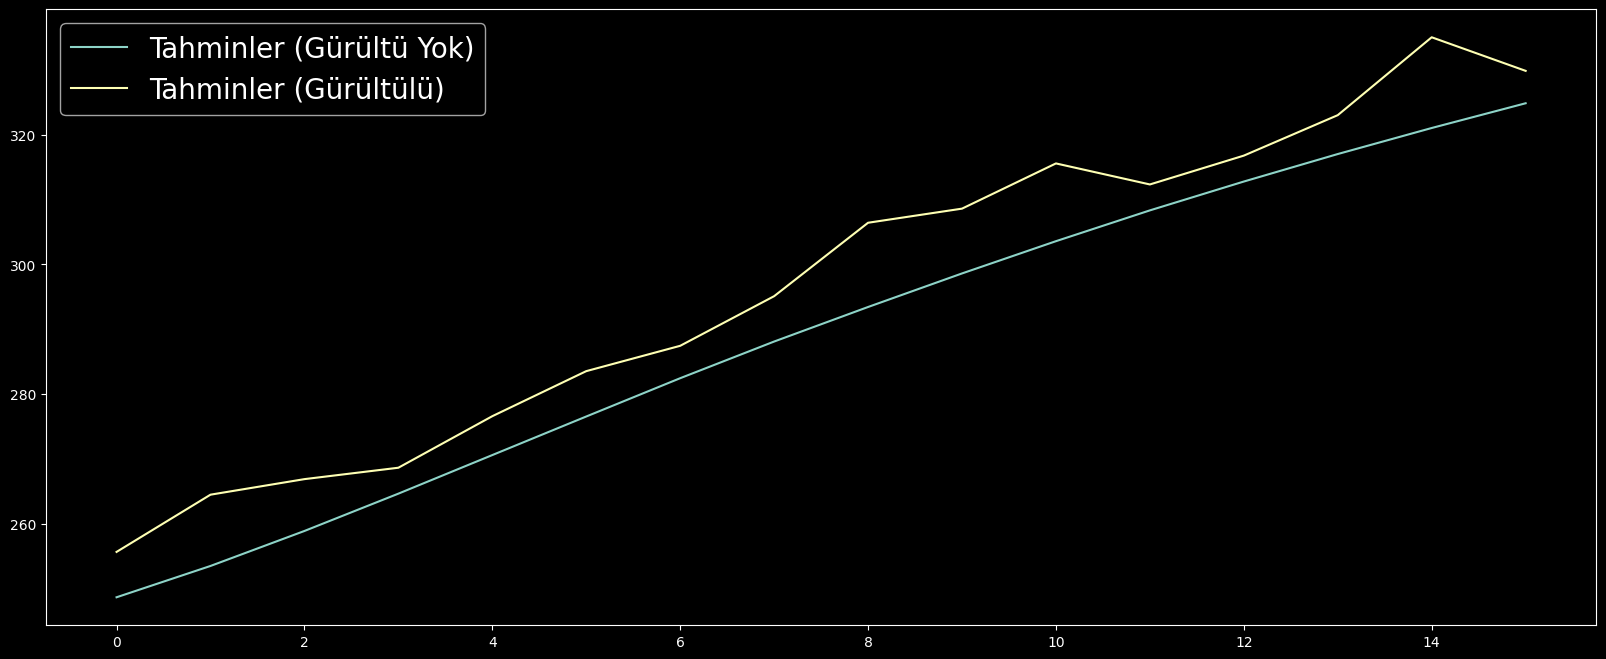

In [85]:
plt.figure(figsize=(20,8))
plt.plot(pred_prices,label="Tahminler (Gürültü Yok)")
plt.plot(pred_prices_noisy,label="Tahminler (Gürültülü)")
plt.legend(prop={"size":20})
plt.show()

### Otomatik ticaret stratejisi

#### Strateji

##### 1 : - rsi > 45 olup olmadığının kontrol edilmesi, bir satın alma pozisyonunu gösterir.
##### 2 : - rsi üzerindeki momentumun güçlü olup olmadığını kontrol etme.

####  SMA (Simple Moving Average) Hareketli Ortalama'yı  hesapla

In [86]:
def calc_sma(data,days):
    # Hareketli Ortalama'yı (SMA) hesaplamak için hareketli ortalama fonksiyonunu kullandım
    sma=data.rolling(days).mean().to_list()
    return sma

# 5 günlük Hareketli Ortalama'yı (SMA) hesapladım
sma_5=calc_sma(close_for_calc,5)

# 10 günlük Hareketli Ortalama'yı (SMA) hesapladım
sma_10=calc_sma(close_for_calc,10)

# 20 günlük Hareketli Ortalama'yı (SMA) hesapladım
sma_20=calc_sma(close_for_calc,20)

# 30 günlük Hareketli Ortalama'yı (SMA) hesapladım
sma_30=calc_sma(close_for_calc,30)

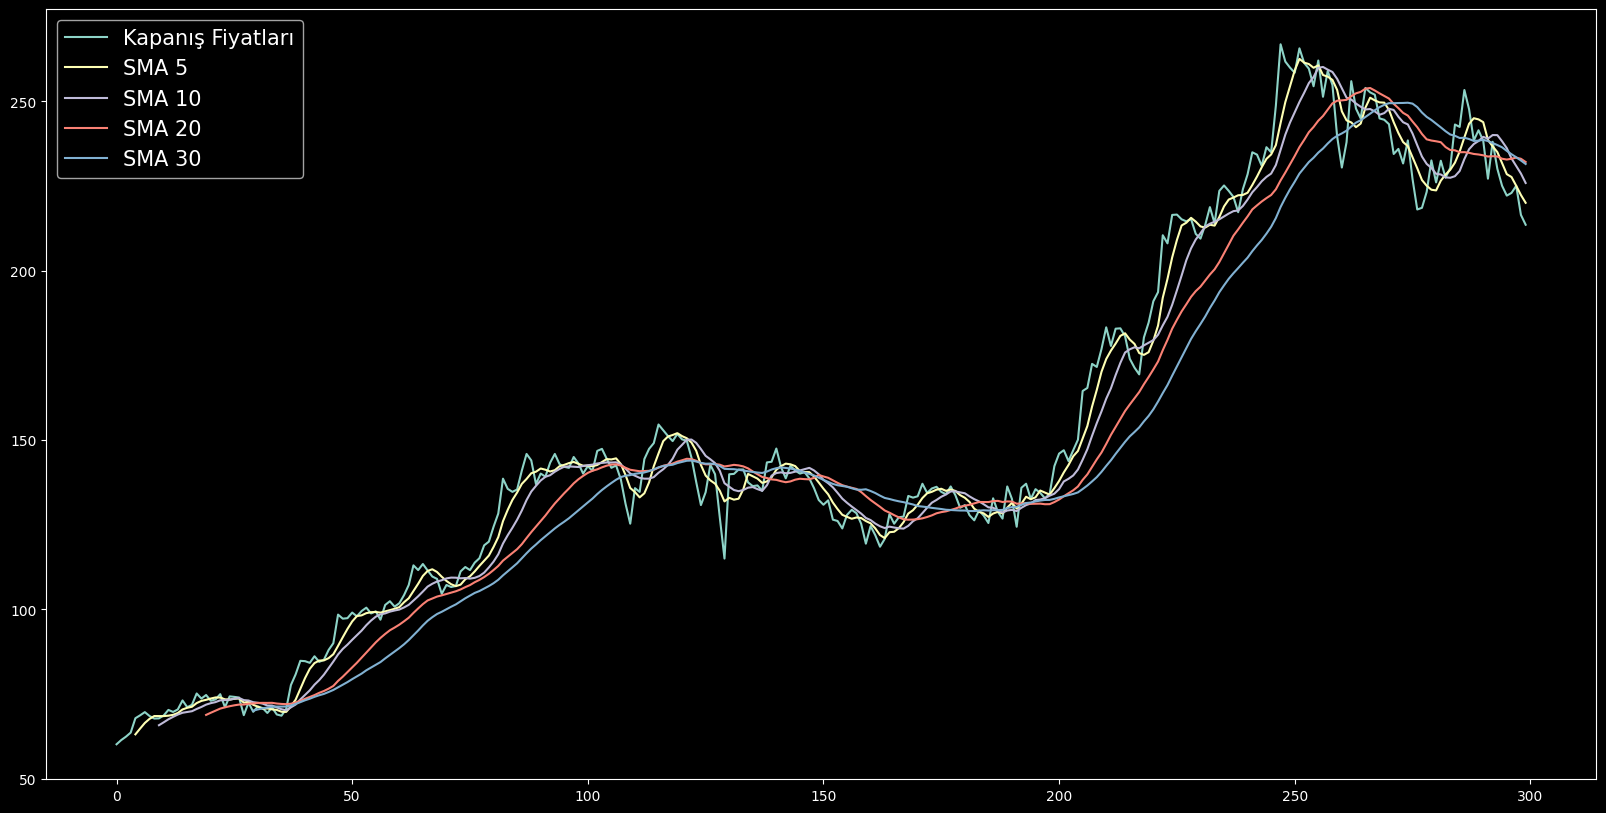

In [87]:
plt.figure(figsize=(20,10))
plt.plot(close_prices,label="Kapanış Fiyatları")
plt.plot(sma_5,label="SMA 5")
plt.plot(sma_10,label="SMA 10")
plt.plot(sma_20,label="SMA 20")
plt.plot(sma_30,label="SMA 30")
plt.legend(prop={"size":15})
plt.show()

In [88]:
trade_params=pd.DataFrame(
    list(
        zip(
            close_prices,
            sma_5,
            sma_10,
            sma_20,
            sma_30,
            momentum_values,
            relative_strength_indexs,
            upper_bollinger_band,
            lower_bollinger_band
        )
    ),
    columns=[
        'Close Prices', 'SMA 5', 'SMA 10', 'SMA 20', 'SMA 30', 'Momentum', 'RSI',
        'Upper Bollinger Band', 'Lower Bollinger Band'
    ]
)

In [89]:
trade_params

,Close Prices,SMA 5,SMA 10,SMA 20,SMA 30,Momentum,RSI,Upper Bollinger Band,Lower Bollinger Band
0,60.150002,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN
1,61.400002,NaN,NaN,NaN,NaN,8.900002,NaN,NaN,NaN
2,62.400002,NaN,NaN,NaN,NaN,7.299995,NaN,NaN,NaN
3,63.599998,NaN,NaN,NaN,NaN,6.849998,NaN,NaN,NaN
4,67.849998,63.080000,NaN,NaN,NaN,5.250000,NaN,68.987027,57.172973
...,...,...,...,...,...,...,...,...,...
285,242.500000,235.219998,229.480002,235.010001,239.220000,-20.300003,54.407555,249.604296,220.835701
286,253.399994,239.399997,233.010001,235.045001,239.286667,-30.399994,60.125833,260.439482,218.360512
287,247.699997,243.439996,235.920000,234.830001,238.910000,-22.599991,56.159163,260.420338,226.459654
288,238.500000,245.059998,237.439999,234.505001,238.363334,-22.000000,50.381720,256.442963,233.677033


In [90]:
print(trade_params["RSI"].iloc[13])

nan


In [91]:
buy_signal = []
sell_signal = []
trigger = 0

for i in range(len(trade_params)):
    sma5 = trade_params["SMA 5"].iloc[i]
    sma20 = trade_params["SMA 20"].iloc[i]
    
    if sma5 < sma20 and trigger != 1:
        # Eğer SMA 5, SMA 20'nin altına geçerse ve daha önce satış sinyali yoksa, satış sinyali oluşturdum
        sell_signal.append(float("nan"))
        buy_signal.append(close_prices[i])
        trigger = 1
    elif sma5 > sma20 and trigger != -1:
        # Eğer SMA 5, SMA 20'nin üzerine çıkarsa ve daha önce alım sinyali yoksa, alım sinyali oluşturdum
        sell_signal.append(close_prices[i])
        buy_signal.append(float("nan"))
        trigger = -1
    else:
        buy_signal.append(float("nan"))
        sell_signal.append(float("nan"))

In [92]:
trade_params["Buy Signal"]=buy_signal
trade_params["Sell Signal"]=sell_signal

In [93]:
trade_params[0:10]

,Close Prices,SMA 5,SMA 10,SMA 20,SMA 30,Momentum,RSI,Upper Bollinger Band,Lower Bollinger Band,Buy Signal,Sell Signal
0,60.150002,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
1,61.400002,NaN,NaN,NaN,NaN,8.900002,NaN,NaN,NaN,NaN,NaN
2,62.400002,NaN,NaN,NaN,NaN,7.299995,NaN,NaN,NaN,NaN,NaN
3,63.599998,NaN,NaN,NaN,NaN,6.849998,NaN,NaN,NaN,NaN,NaN
4,67.849998,63.080000,NaN,NaN,NaN,5.250000,NaN,68.987027,57.172973,NaN,NaN
5,68.699997,64.789999,NaN,NaN,NaN,2.400002,NaN,71.368141,58.211857,NaN,NaN
6,69.650002,66.439999,NaN,NaN,NaN,2.150002,NaN,72.904285,59.975714,NaN,NaN
7,68.500000,67.659999,NaN,NaN,NaN,6.650002,NaN,72.378793,62.941206,NaN,NaN
8,67.750000,68.489999,NaN,NaN,NaN,5.900002,NaN,70.021993,66.958006,NaN,NaN
9,67.800003,68.480000,65.78,NaN,NaN,6.899994,NaN,70.033383,66.926618,NaN,NaN


In [94]:
print(len(trade_params["SMA 20"]))
print(len(close_prices))

290
300


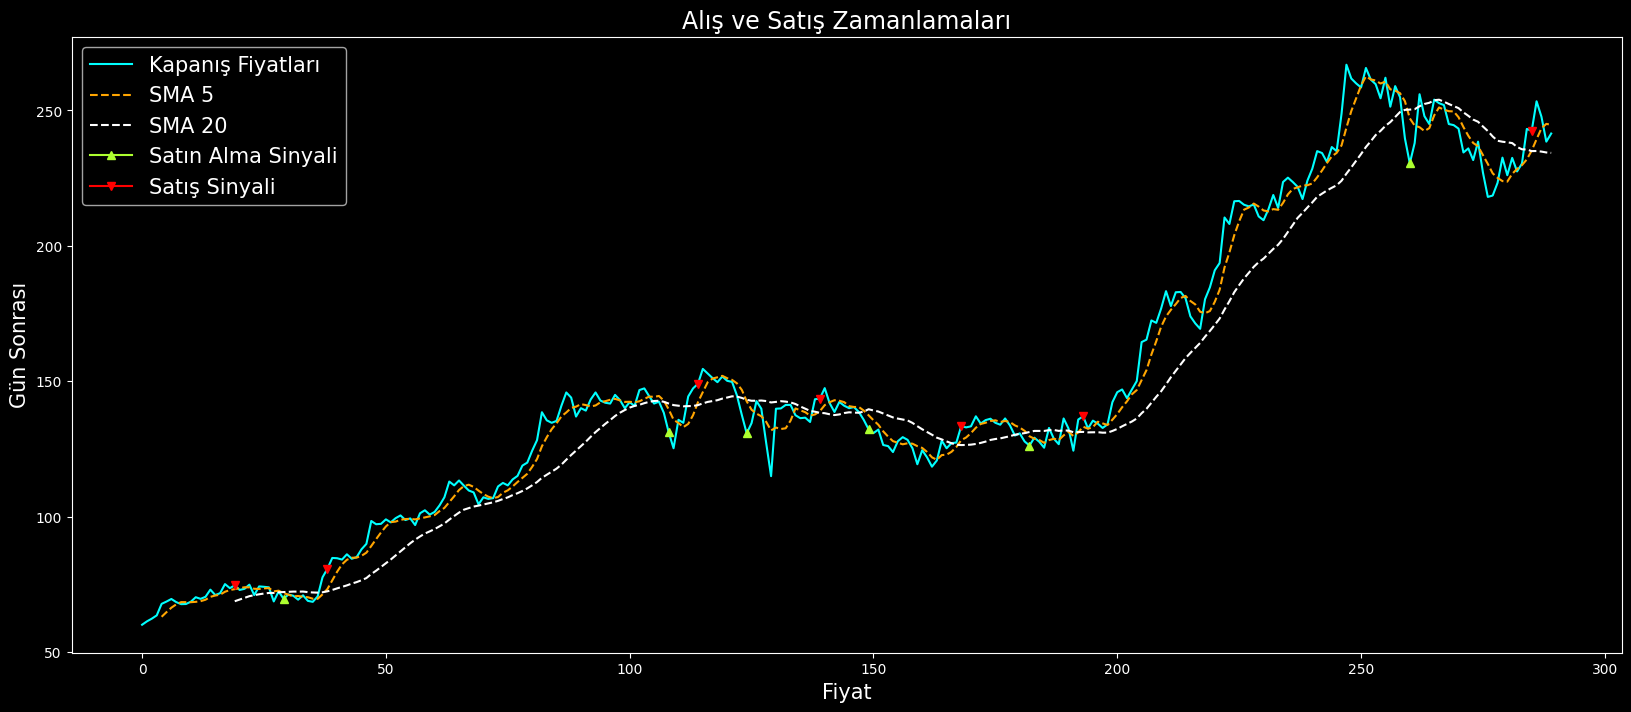

In [95]:
plt.figure(figsize=(20, 8))
plt.plot(trade_params["Close Prices"], label="Kapanış Fiyatları", color="cyan")
plt.plot(trade_params["SMA 5"], linestyle="--", label="SMA 5", color="orange")
plt.plot(trade_params["SMA 20"], linestyle="--", label="SMA 20", color="white")
plt.plot(trade_params["Buy Signal"], marker="^", color="greenyellow", label="Satın Alma Sinyali")
plt.plot(trade_params["Sell Signal"], marker="v", color="r", label="Satış Sinyali")
plt.legend(prop={"size": 15})
plt.title("Alış ve Satış Zamanlamaları", fontsize=17)
plt.ylabel("Gün Sonrası", fontsize=15)
plt.xlabel("Fiyat", fontsize=15)
plt.savefig("graphed-results/Algoritmik İşlem Sonuçları")
plt.show()

## Toplanan verilere dayalı bir analiz raporu oluşturdum

In [96]:
FONT_FAMILY = "Arial"
WIDTH = 210
HEIGHT = 297

pdf = FPDF()
pdf.add_page()
pdf.set_font(FONT_FAMILY, size=40)
pdf.ln(40)
pdf.multi_cell(w=0, h=15, txt=f"Hisse senedi analizi: {ticker}")


pdf.add_page()
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Giris")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"Bu rapor, {ticker} hissesini cesitli teknik gostergeleri ve diger teknikleri kullanarak analiz edecek ve verilen hissenin gelecekteki egilimleri hakkinda fikir verecektir.")
pdf.ln(15)


pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Kullanilan Gostergeler")
pdf.ln(15)


indicators = ["RSI", "Bollinger Bantlari", "OBV", "Momentum"]
pdf.set_font(FONT_FAMILY, size=13)
for i in range(len(indicators)):
    pdf.cell(0, txt=f"{i+1}. {indicators[i]}")
    pdf.ln(6)


pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="RSI")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"RSI veya Goreceli Güc Endeksi, bir hissenin asiri alim veya asiri satim durumunu gosterir. RSI >= 70, bir hissenin asiri alindigini ve fiyatda bir dusus olabilecegini gosterirken, RSI <= 30, bir hissenin asiri satildigini ve yakin bir gelecekte boga egilimi gosterebilecegini gosterir.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(w=0, h=8, txt=f"RSI grafigi, {ticker} icin bir yil boyunca asagida verilmistir.")
pdf.ln(8)
pdf.image("graphed-results/RSI.png", 12, 100, WIDTH - 20, 100)
pdf.ln(115)
pdf.set_font(FONT_FAMILY, size=13)

curr_rsi = relative_strength_indexs[len(relative_strength_indexs) - 1]
rsi_mean = pd.Series(relative_strength_indexs).mean()

rsi_state_rel = f"high" if curr_rsi > rsi_mean + 2.5 else f"low"
rsi_state_abs = f"low" if curr_rsi < 45 else (f"medium" if curr_rsi < 60 else f"high")
sell_state = f"selling" if rsi_state_abs == "low" else f"buying"
price_action_dir = f"upward" if sell_state == "selling" else f"downward"

pdf.multi_cell(w=0, h=7, txt=f"Mevcut RSInin {round(curr_rsi, 2)} oldugu goruluyor ki bu, bir yil suren hisse senedi egilimine gore {rsi_state_rel} olarak kabul edilir. Normal bir senaryoda boyle bir RSI, {rsi_state_abs} olarak kabul edilir. Bu nedenle bu, daha fazla {sell_state} oldugunu ve yakin bir gelecekte {price_action_dir} bir egilim olabilecegini gosterir. Unutmayin ki bu, sirket veya sirketin genel performansi veya karliligi hakkindaki insanlarin duygularini dikkate almayan yalnizca bir teknik gosterge oldugu icin bu stratejiyi kullanmanin bir riski vardir. Bu, sadece bu gosterge icin degil, bundan sonraki tum diger gostergeler icin de gecerlidir.")


pdf.add_page()  
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Bollinger Bantlari")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"Bollinger bantlari kullanarak hisse senedi piyasasinin volatilitesi hakkinda bir fikir edinmek mumkun ve herhangi bir buyuk trendin olup olmadigini takip etmek mumkun. RSI ile birlestirildiginde, bir hissenin durumu hakkinda cok net bir resim elde edebiliriz.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"{ticker} icin Bollinger Bantlarinin bir yili boyunca bir gorsellestirmesi.")
pdf.ln(8)
pdf.image("graphed-results/SMA+Bollinger Bantları.png",
          12, 90, WIDTH - 20, 100)
pdf.ln(100)
pdf.set_font(FONT_FAMILY, size=13)

close_price_sma_status = "above" if close_prices[len(close_prices) - 1] > close_avg[len(close_avg) - 1] else "below"
close_sma_stat_msg = "bu, hisse senedinin 5 gunluk SMA donemi uzerinde boga egilimi gosterdigi anlamina gelir." if close_price_sma_status == "uzerinde" else "bu, hisse senedinin yakin gecmiste veya 5 gunluk SMA donemi boyunca dusus gosterdigi anlamina gelir." if close_price_sma_status == "above" else "bu, hisse senedinin yakin zamanda veya SMA donemi boyunca dusus egilimi gosterdigi anlamina gelir"


pdf.multi_cell(w=0, h=7, txt=f"Bu durumda, mevcut kapanis fiyatinin 5 gunluk bir donem uzerinde oldugunu gorebiliriz. {close_sma_stat_msg}")
pdf.ln(8)

closer_band = "upper band" if abs(upper_bollinger_band[len(upper_bollinger_band) - 1] - close_prices[len(close_prices) - 1]) < abs(
    lower_bollinger_band[len(lower_bollinger_band) - 1] - close_prices[len(close_prices) - 1]) else "lower band"

print(abs(upper_bollinger_band[len(upper_bollinger_band) - 1] - close_prices[len(close_prices) - 1]))
print(abs(lower_bollinger_band[len(
    lower_bollinger_band) - 1] - close_prices[len(close_prices) - 1]))

pdf.multi_cell(w=0, h=7, txt=f"Artik devam edip ust ve alt bollinger bantlarina bakabiliriz. Sectigimiz hisse senedinin {closer_band} bandina daha yakin oldugunu gorebiliriz. Buna bakarak hisse senedinin egilimini ve gucunu tespit edebiliriz. Boylece bu, RSI gostergemizi cok sorunsuz bir sekilde tamamliyor.")



pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="OBV")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"OBV veya On Balance Volume, bir varligin toplam islem hacmi hakkinda bir fikir edinmek ve hareket edip etmedigini takip etmek icin kullanilabilir. Bir hissenin OBV'sindeki herhangi buyuk hareketler, buyuk kurumsal yatirimcilar tarafindan yapilan herhangi hareketleri takip etmek icin kullanilabilir.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"{ticker} icin bir yil boyunca OBV'nin bir gorsellestirmesi.")
pdf.ln(3)
pdf.image("graphed-results/SMA(OBV) + OBV.png",
          12, 90, WIDTH - 20, 100)
pdf.ln(120)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f'Bu durumda, son OBV trendine bakarsak, buyuk kurumsal yatirimcilarla sadece siradan yatirincilar arasindaki genel gorunum hakkinda iyi bir fikir edinebiliriz. Ayrica, OBV gostergesi herhangi baska ayrinti gerektirmez.')



pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Momentum")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=13)
pdf.multi_cell(w=0, h=7, txt=f"Adi gibi Momentum gostergesi bize bir hisse senedinin momentumu, yani bir hisse senedinin sahip oldugu trendin gucu hakkinda fikir verir. Momentuma bakarak bir alim, satim, yukselis veya dusus egiliminin ne kadar sure devam edecegini belirleyebiliriz.")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"{ticker} icin bir yil boyunca Momentum'un bir gorsellestirmesi.")
pdf.ln(3)
pdf.image("graphed-results/momentum.png",
          12, 90, WIDTH - 20, 100)

pdf.ln(110)
pdf.set_font(FONT_FAMILY, size=13)

momentum_over_0 = "over zero" if momentum_values[len(momentum_values) - 1] > 0 else "below zero"
curr_momentum = momentum_values[len(momentum_values) - 1]
pdf.multi_cell(
    w=0, h=7, txt=f"Son momentum degerlerine baktigimizda, hissenin momentumunu kolayca cikarabiliriz. Hissenin mevcut momentumu {round(curr_momentum, 2)} ve yil boyunca ortalama momentumu {round(avg_momentum, 2)}.")


pdf.add_page()
pdf.ln(5)
pdf.set_font(FONT_FAMILY, size=40)
pdf.cell(0, txt="Son Gelecekteki Trend")
pdf.ln(15)
pdf.set_font(FONT_FAMILY, size=25)
pdf.multi_cell(
    w=0, h=10, txt=f"Yapay Sinir Agi'nin {ticker} icin gelecekteki 5 günlük trend tahmini.")
pdf.ln(3)
pdf.image(f"graphed-results/15 gün boyunca gelecek trendi.png",
          12, 70, WIDTH - 20, 100)


16.1250965169734
3.165105061895275


In [97]:
pdf.output(f"{ticker} Analiz Raporu.pdf")

''